<a href="https://colab.research.google.com/github/kanthavelan/Delhivery_EDA_dataset/blob/main/Delhivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import wilcoxon
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
df = pd.read_csv('/content/delhivery_data.csv')
df.head()

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

                od_start_time                 od_end_time  \
0  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
1  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
2  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
3  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
4  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   

   start_scan_to_end_scan is_cutoff  cutoff_factor  \
0                    86.0      True            9.0   
1                    86.0      True           18.0   
2                    86.0      True           27.0   
3                    86.0      True           36.0   
4                    86.0     False           39.0   

             cutoff_timestamp  actual_distance_to_destination  actual_time  \
0         2018-09-20 04:27:55                       10.435660         14.0   
1         2018-09-20 04:17:55                       18.936842         24.0   
2  2018-09-20 04:01:19.505586                       27.637279         40.0   
3         2018-09-20 03:39:57                       36.118028         62.0   
4         2018-09-20 03:33:55                       39.386040         68.0   

   osrm_time  osrm_distance    factor  segment_actual_time  segment_osrm_time  \
0       11.0        11.9653  1.272727                 14.0               11.0   
1       20.0        21.7243  1.200000                 10.0                9.0   
2       28.0        32.5395  1.428571                 16.0                7.0   
3       40.0        45.5620  1.550000                 21.0               12.0   
4       44.0        54.2181  1.545455                  6.0                5.0   

   segment_osrm_distance  segment_factor  
0                11.9653        1.272727  
1                 9.7590        1.111111  
2                10.8152        2.285714  
3                13.0224        1.750000  
4                 3.9153        1.200000

In [4]:
df.shape

(24591, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24591 entries, 0 to 24590
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   data                            24591 non-null  object 
 1   trip_creation_time              24591 non-null  object 
 2   route_schedule_uuid             24591 non-null  object 
 3   route_type                      24591 non-null  object 
 4   trip_uuid                       24591 non-null  object 
 5   source_center                   24591 non-null  object 
 6   source_name                     24515 non-null  object 
 7   destination_center              24591 non-null  object 
 8   destination_name                24536 non-null  object 
 9   od_start_time                   24590 non-null  object 
 10  od_end_time                     24590 non-null  object 
 11  start_scan_to_end_scan          24590 non-null  float64
 12  is_cutoff                       

In [6]:
df.describe()

start_scan_to_end_scan  cutoff_factor  actual_distance_to_destination  \
count            24590.000000   24590.000000                    24590.000000   
mean               895.714396     219.484465                      220.597296   
std                991.461708     333.566432                      333.767276   
min                 25.000000       9.000000                        9.000267   
25%                150.000000      22.000000                       23.143647   
50%                409.000000      56.000000                       57.514510   
75%               1399.000000     264.000000                      264.067870   
max               3702.000000    1722.000000                     1722.009755   

        actual_time     osrm_time  osrm_distance        factor  \
count  24590.000000  24590.000000   24590.000000  24590.000000   
mean     389.968402    202.201871     268.704937      2.080711   
std      570.021354    299.118121     408.567650      1.385253   
min        9.000000      6.000000       9.101900      0.250000   
25%       50.000000     27.000000      29.273325      1.600000   
50%      121.000000     60.000000      72.879000      1.851852   
75%      462.000000    233.000000     307.444750      2.212869   
max     3382.000000   1611.000000    2191.166400     77.387097   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
count         24590.000000       24590.000000           24590.000000   
mean             35.470435          18.353721              22.602381   
std              47.691381          13.414021              15.772537   
min             -26.000000           0.000000               0.000000   
25%              20.000000          11.000000              11.941875   
50%              28.000000          17.000000              23.435750   
75%              40.000000          22.000000              27.653575   
max            2297.000000         469.000000             635.119600   

       segment_factor  
count    24590.000000  
mean         2.196804  
std          6.661833  
min         -1.857143  
25%          1.350000  
50%          1.687500  
75%          2.250000  
max        574.250000

In [7]:
#For Backp

df_data = df.copy()
df_data.head(1)

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

                od_start_time                 od_end_time  \
0  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   

   start_scan_to_end_scan is_cutoff  cutoff_factor     cutoff_timestamp  \
0                    86.0      True            9.0  2018-09-20 04:27:55   

   actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                        10.43566         14.0       11.0        11.9653   

     factor  segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0  1.272727                 14.0               11.0                11.9653   

   segment_factor  
0        1.272727

In [8]:
df_data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [9]:
#duplicate check
df_data[df_data.duplicated()]

Empty DataFrame
Columns: [data, trip_creation_time, route_schedule_uuid, route_type, trip_uuid, source_center, source_name, destination_center, destination_name, od_start_time, od_end_time, start_scan_to_end_scan, is_cutoff, cutoff_factor, cutoff_timestamp, actual_distance_to_destination, actual_time, osrm_time, osrm_distance, factor, segment_actual_time, segment_osrm_time, segment_osrm_distance, segment_factor]
Index: []

There is no duplicate data.

In [10]:
df_data.isnull().sum()

data                               0
trip_creation_time                 0
route_schedule_uuid                0
route_type                         0
trip_uuid                          0
source_center                      0
source_name                       76
destination_center                 0
destination_name                  55
od_start_time                      1
od_end_time                        1
start_scan_to_end_scan             1
is_cutoff                          1
cutoff_factor                      1
cutoff_timestamp                   1
actual_distance_to_destination     1
actual_time                        1
osrm_time                          1
osrm_distance                      1
factor                             1
segment_actual_time                1
segment_osrm_time                  1
segment_osrm_distance              1
segment_factor                     1
dtype: int64

source_name and destination_name has null values.

In [11]:
total_missing_df = df_data.isnull().sum().sort_values(ascending =False)
percent_missing_df = (df_data.isnull().sum()/len(df_data)*100).sort_values(ascending=False)
missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percent'])
missing_data_df[missing_data_df['Total'] > 0]

Total   Percent
source_name                        76  0.309056
destination_name                   55  0.223659
cutoff_factor                       1  0.004067
cutoff_timestamp                    1  0.004067
start_scan_to_end_scan              1  0.004067
od_end_time                         1  0.004067
od_start_time                       1  0.004067
is_cutoff                           1  0.004067
actual_time                         1  0.004067
osrm_time                           1  0.004067
osrm_distance                       1  0.004067
factor                              1  0.004067
segment_actual_time                 1  0.004067
segment_osrm_time                   1  0.004067
segment_osrm_distance               1  0.004067
actual_distance_to_destination      1  0.004067
segment_factor                      1  0.004067

In [12]:
#Drpping the missing values in the dataset.
df_data.dropna(subset=['source_name','destination_name'], inplace=True)

In [13]:
# Dropping unknown fields

unknown_fields = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
df_data = df_data.drop(columns = unknown_fields)

In [14]:
df_data.shape

(24460, 19)

In [15]:
#Checking the unique value for columns

for _ in df_data.columns:
  print(f'Total unique values in {_} : {df_data[_].nunique()}')
  print(f'unique values in{_} : {df_data[_].unique()}')
  print()
  print('_'*100)

Total unique values in data : 2
unique values indata : ['training' 'test']

____________________________________________________________________________________________________
Total unique values in trip_creation_time : 2538
unique values intrip_creation_time : ['2018-09-20 02:35:36.476840' '2018-09-23 06:42:06.021680'
 '2018-09-14 15:42:46.437249' ... '2018-09-22 22:35:35.354727'
 '2018-09-30 10:29:31.984988' '2018-09-27 01:33:41.668026']

____________________________________________________________________________________________________
Total unique values in route_schedule_uuid : 1059
unique values inroute_schedule_uuid : ['thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef'
 'thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc211728881b'
 'thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d315e6' ...
 'thanos::sroute:646f3205-3510-453d-9157-71ec44d2f383'
 'thanos::sroute:603ce20c-3b56-4055-91fd-a86adbcfb01b'
 'thanos::sroute:21dcaeeb-fa40-45f1-85e9-0b10815d794d']

_____________________________

In [16]:
df_data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance'],
      dtype='object')

In [17]:
#Convert datatypes for category columns
df_data['data']  = df_data['data'].astype('category')
df_data['route_type']  = df_data['route_type'].astype('category')


In [18]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24460 entries, 0 to 24590
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   data                            24460 non-null  category
 1   trip_creation_time              24460 non-null  object  
 2   route_schedule_uuid             24460 non-null  object  
 3   route_type                      24460 non-null  category
 4   trip_uuid                       24460 non-null  object  
 5   source_center                   24460 non-null  object  
 6   source_name                     24460 non-null  object  
 7   destination_center              24460 non-null  object  
 8   destination_name                24460 non-null  object  
 9   od_start_time                   24459 non-null  object  
 10  od_end_time                     24459 non-null  object  
 11  start_scan_to_end_scan          24459 non-null  float64 
 12  actual_distance_to_dest

In [19]:
time_fields = ['trip_creation_time','od_start_time','od_end_time']
for _ in time_fields:
  df_data[_] = pd.to_datetime(df_data[_])

In [20]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24460 entries, 0 to 24590
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            24460 non-null  category      
 1   trip_creation_time              24460 non-null  datetime64[ns]
 2   route_schedule_uuid             24460 non-null  object        
 3   route_type                      24460 non-null  category      
 4   trip_uuid                       24460 non-null  object        
 5   source_center                   24460 non-null  object        
 6   source_name                     24460 non-null  object        
 7   destination_center              24460 non-null  object        
 8   destination_name                24460 non-null  object        
 9   od_start_time                   24459 non-null  datetime64[ns]
 10  od_end_time                     24459 non-null  datetime64[ns]
 11  start_s

#Exploratory Data Analysis

In [21]:
df_data.head()

data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

               od_start_time                od_end_time  \
0 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
1 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
2 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
3 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
4 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                    86.0                       10.435660         14.0   
1                    86.0                       18.936842         24.0   
2                    86.0                       27.637279         40.0   
3                    86.0                       36.118028         62.0   
4                    86.0                       39.386040         68.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0       11.0        11.9653                 14.0               11.0   
1       20.0        21.7243                 10.0                9.0   
2       28.0        32.5395                 16.0                7.0   
3       40.0        45.5620                 21.0               12.0   
4       44.0        54.2181                  6.0                5.0   

   segment_osrm_distance  
0                11.9653  
1                 9.7590  
2                10.8152  
3                13.0224  
4                 3.9153

Text(0.5, 1.0, 'data Distributions')

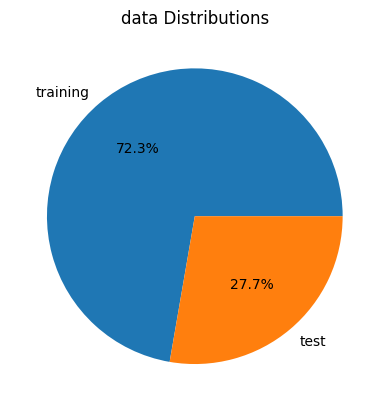

In [22]:
plt.pie(df_data['data'].value_counts(), labels=df_data['data'].value_counts().index,autopct='%1.1f%%')
plt.title('data Distributions')



  

*   72.5% of data is training data
*   27.5% of data is test data







Text(0.5, 1.0, 'Route Type Distributions')

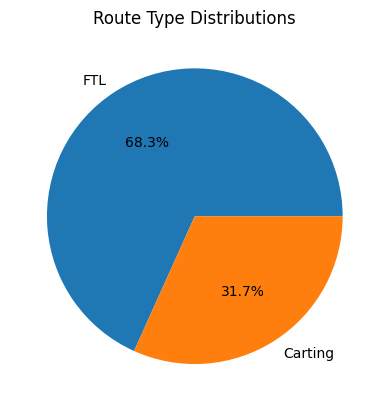

In [23]:
plt.pie(df_data['route_type'].value_counts(), labels=df_data['route_type'].value_counts().index,autopct='%1.1f%%')
plt.title('Route Type Distributions')



*   68.7% of distribution in the route type is FTL
*   31.3% of distribution in the route type is Carting



Text(0.5, 1.0, 'Route Type vs Actual Time')

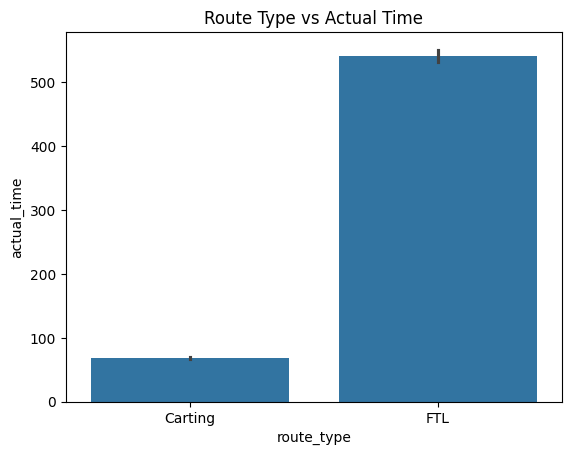

In [24]:
sns.barplot(x='route_type',y='actual_time',data=df_data)
plt.title('Route Type vs Actual Time')

Text(0.5, 1.0, 'Route Type vs OSRM Time')

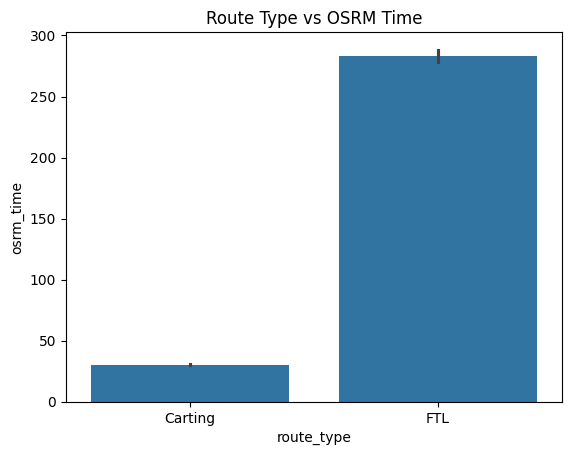

In [25]:
sns.barplot(x='route_type',y='osrm_time',data=df_data)
plt.title('Route Type vs OSRM Time')

In the FTL (Route Type) segment, the actual time is significantly higher than the OSRM estimated time.

Text(0.5, 1.0, 'Route Type vs Actual Distance to Destination')

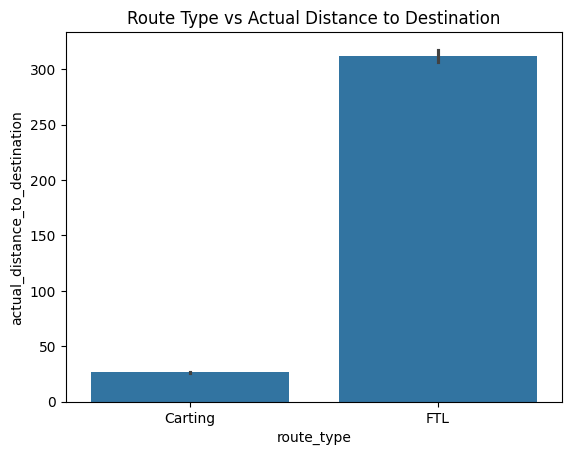

In [26]:
sns.barplot(x='route_type',y='actual_distance_to_destination',data=df_data)
plt.title('Route Type vs Actual Distance to Destination')

Text(0.5, 1.0, 'Route Type vs OSRM Distance')

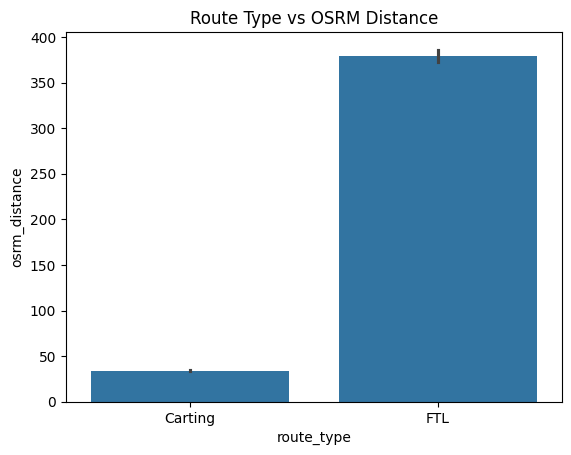

In [27]:
sns.barplot(x='route_type',y='osrm_distance',data=df_data)
plt.title('Route Type vs OSRM Distance')

In both the FTL and Carting segments, the actual distance closely matches the OSRM distance.

#Merging the Rows

---


using (Hint: You can use inbuilt functions like groupby and aggregations like
sum(), cumsum() to merge some rows based on their 1. Trip_uuid, Source ID and Destination ID 2. Further aggregate on the basis of just Trip_uuid. You can also keep the first and last values for some numeric/categorical fields if aggregating them won’t make sense.)

In [28]:
segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

df_data['segment_key'] = df_data['trip_uuid'] + df_data['source_center'] + df_data['destination_center']

for col in segment_cols:
  df_data[col + '_sum'] = df_data.groupby('segment_key')[col].cumsum()


In [29]:
df_data.loc[:,['segment_key','segment_actual_time_sum', 'segment_osrm_distance_sum', 'segment_osrm_time_sum']].head()

segment_key  segment_actual_time_sum  \
0  trip-153741093647649320IND388121AAAIND388620AAB                     14.0   
1  trip-153741093647649320IND388121AAAIND388620AAB                     24.0   
2  trip-153741093647649320IND388121AAAIND388620AAB                     40.0   
3  trip-153741093647649320IND388121AAAIND388620AAB                     61.0   
4  trip-153741093647649320IND388121AAAIND388620AAB                     67.0   

   segment_osrm_distance_sum  segment_osrm_time_sum  
0                    11.9653                   11.0  
1                    21.7243                   20.0  
2                    32.5395                   27.0  
3                    45.5619                   39.0  
4                    49.4772                   44.0

In [30]:
# Aggregating at segment level & Creating a dictionary for aggregation at segment level

segment_dict = {
  'trip_uuid' : 'first',
  'data': 'first',
  'route_type': 'first',
  'trip_creation_time': 'first',
  'source_name': 'first',
  'destination_name': 'last',
  'od_start_time': 'first',
  'od_end_time': 'last',
  'start_scan_to_end_scan': 'first',
  'actual_distance_to_destination': 'last',
  'actual_time': 'last',
  'osrm_time': 'last',
  'osrm_distance': 'last',
  'segment_actual_time' : 'sum',
  'segment_osrm_time' : 'sum',
  'segment_osrm_distance' : 'sum',
  'segment_actual_time_sum': 'last',
  'segment_osrm_time_sum': 'last',
  'segment_osrm_distance_sum': 'last',
}

# Grouping by segment_key and aggregating
segment_agg_data = df_data.groupby('segment_key').agg(segment_dict).reset_index()
segment_agg_data = segment_agg_data.sort_values(by=['segment_key','od_end_time'])
segment_agg_data

segment_key  \
0     trip-153671079956500691IND110024AAAIND110014AAA   
1     trip-153671110078355292IND121004AABIND121001AAA   
2     trip-153671191949943656IND487001AABIND487551AAA   
3     trip-153671191949943656IND487551AAAIND464668AAA   
4     trip-153671237597058150IND785690AABIND785682AAA   
...                                               ...   
4621  trip-153861089872028474IND602024AAAIND602001AAA   
4622  trip-153861106442901555IND208006AAAIND209304AAA   
4623  trip-153861106442901555IND209304AAAIND208006AAA   
4624  trip-153861118270144424IND583119AAAIND583101AAA   
4625  trip-153861118270144424IND583201AAAIND583119AAA   

                    trip_uuid      data route_type         trip_creation_time  \
0     trip-153671079956500691  training    Carting 2018-09-12 00:06:39.565253   
1     trip-153671110078355292  training    Carting 2018-09-12 00:11:40.783923   
2     trip-153671191949943656  training        FTL 2018-09-12 00:25:19.499696   
3     trip-153671191949943656  training        FTL 2018-09-12 00:25:19.499696   
4     trip-153671237597058150  training    Carting 2018-09-12 00:32:55.970840   
...                       ...       ...        ...                        ...   
4621  trip-153861089872028474      test    Carting 2018-10-03 23:54:58.720536   
4622  trip-153861106442901555      test    Carting 2018-10-03 23:57:44.429324   
4623  trip-153861106442901555      test    Carting 2018-10-03 23:57:44.429324   
4624  trip-153861118270144424      test        FTL 2018-10-03 23:59:42.701692   
4625  trip-153861118270144424      test        FTL 2018-10-03 23:59:42.701692   

                                  source_name  \
0                     Delhi_Lajpat_IP (Delhi)   
1                FBD_Balabhgarh_DPC (Haryana)   
2     Narsinghpur_KndliDPP_D (Madhya Pradesh)   
3         Gadarwara_MPward_D (Madhya Pradesh)   
4                Sonari_Central_DPP_1 (Assam)   
...                                       ...   
4621         Chennai_Vepmpttu_DC (Tamil Nadu)   
4622       Kanpur_GovndNgr_DC (Uttar Pradesh)   
4623       Kanpur_Central_H_6 (Uttar Pradesh)   
4624            Sandur_WrdN1DPP_D (Karnataka)   
4625                       Hospet (Karnataka)   

                         destination_name              od_start_time  \
0                    Delhi_Bhogal (Delhi) 2018-09-12 00:06:39.565253   
1                     Faridabad (Haryana) 2018-09-12 00:11:40.783923   
2     Gadarwara_MPward_D (Madhya Pradesh) 2018-09-12 04:33:09.726898   
3      Bareli_SourvDPP_D (Madhya Pradesh) 2018-09-12 05:59:13.062416   
4            Sivasagar_Babupaty_D (Assam) 2018-09-12 03:48:42.530167   
...                                   ...                        ...   
4621     Chennai_Thiruvlr_DC (Tamil Nadu) 2018-10-04 02:03:42.668131   
4622   Kanpur_Central_H_6 (Uttar Pradesh) 2018-10-04 02:51:27.075797   
4623   Kanpur_GovndNgr_DC (Uttar Pradesh) 2018-10-03 23:57:44.429324   
4624               Bellary_Dc (Karnataka) 2018-10-04 03:58:40.726547   
4625        Sandur_WrdN1DPP_D (Karnataka) 2018-10-04 02:51:44.712656   

                    od_end_time  start_scan_to_end_scan  \
0    2018-09-12 00:55:59.568645                    49.0   
1    2018-09-12 00:50:10.814399                    38.0   
2    2018-09-12 05:59:13.062416                    86.0   
3    2018-09-12 09:23:49.463096                   204.0   
4    2018-09-12 08:00:47.150111                   252.0   
...                         ...                     ...   
4621 2018-10-04 02:57:23.720337                    53.0   
4622 2018-10-04 06:59:51.621332                   248.0   
4623 2018-10-04 02:51:27.075797                   173.0   
4624 2018-10-04 08:46:09.166940                   287.0   
4625 2018-10-04 03:58:40.726547                    66.0   

      actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                           9.872146         23.0        8.0         9.9566   
1                           9.396526         17.0        9.0   

#Feature Engineering

In [31]:
segment_agg_data['od_total_time'] = segment_agg_data['od_end_time'] - segment_agg_data['od_start_time']
segment_agg_data['od_total_time'] = (segment_agg_data['od_total_time']).dt.total_seconds()/3600
segment_agg_data

segment_key  \
0     trip-153671079956500691IND110024AAAIND110014AAA   
1     trip-153671110078355292IND121004AABIND121001AAA   
2     trip-153671191949943656IND487001AABIND487551AAA   
3     trip-153671191949943656IND487551AAAIND464668AAA   
4     trip-153671237597058150IND785690AABIND785682AAA   
...                                               ...   
4621  trip-153861089872028474IND602024AAAIND602001AAA   
4622  trip-153861106442901555IND208006AAAIND209304AAA   
4623  trip-153861106442901555IND209304AAAIND208006AAA   
4624  trip-153861118270144424IND583119AAAIND583101AAA   
4625  trip-153861118270144424IND583201AAAIND583119AAA   

                    trip_uuid      data route_type         trip_creation_time  \
0     trip-153671079956500691  training    Carting 2018-09-12 00:06:39.565253   
1     trip-153671110078355292  training    Carting 2018-09-12 00:11:40.783923   
2     trip-153671191949943656  training        FTL 2018-09-12 00:25:19.499696   
3     trip-153671191949943656  training        FTL 2018-09-12 00:25:19.499696   
4     trip-153671237597058150  training    Carting 2018-09-12 00:32:55.970840   
...                       ...       ...        ...                        ...   
4621  trip-153861089872028474      test    Carting 2018-10-03 23:54:58.720536   
4622  trip-153861106442901555      test    Carting 2018-10-03 23:57:44.429324   
4623  trip-153861106442901555      test    Carting 2018-10-03 23:57:44.429324   
4624  trip-153861118270144424      test        FTL 2018-10-03 23:59:42.701692   
4625  trip-153861118270144424      test        FTL 2018-10-03 23:59:42.701692   

                                  source_name  \
0                     Delhi_Lajpat_IP (Delhi)   
1                FBD_Balabhgarh_DPC (Haryana)   
2     Narsinghpur_KndliDPP_D (Madhya Pradesh)   
3         Gadarwara_MPward_D (Madhya Pradesh)   
4                Sonari_Central_DPP_1 (Assam)   
...                                       ...   
4621         Chennai_Vepmpttu_DC (Tamil Nadu)   
4622       Kanpur_GovndNgr_DC (Uttar Pradesh)   
4623       Kanpur_Central_H_6 (Uttar Pradesh)   
4624            Sandur_WrdN1DPP_D (Karnataka)   
4625                       Hospet (Karnataka)   

                         destination_name              od_start_time  \
0                    Delhi_Bhogal (Delhi) 2018-09-12 00:06:39.565253   
1                     Faridabad (Haryana) 2018-09-12 00:11:40.783923   
2     Gadarwara_MPward_D (Madhya Pradesh) 2018-09-12 04:33:09.726898   
3      Bareli_SourvDPP_D (Madhya Pradesh) 2018-09-12 05:59:13.062416   
4            Sivasagar_Babupaty_D (Assam) 2018-09-12 03:48:42.530167   
...                                   ...                        ...   
4621     Chennai_Thiruvlr_DC (Tamil Nadu) 2018-10-04 02:03:42.668131   
4622   Kanpur_Central_H_6 (Uttar Pradesh) 2018-10-04 02:51:27.075797   
4623   Kanpur_GovndNgr_DC (Uttar Pradesh) 2018-10-03 23:57:44.429324   
4624               Bellary_Dc (Karnataka) 2018-10-04 03:58:40.726547   
4625        Sandur_WrdN1DPP_D (Karnataka) 2018-10-04 02:51:44.712656   

                    od_end_time  start_scan_to_end_scan  \
0    2018-09-12 00:55:59.568645                    49.0   
1    2018-09-12 00:50:10.814399                    38.0   
2    2018-09-12 05:59:13.062416                    86.0   
3    2018-09-12 09:23:49.463096                   204.0   
4    2018-09-12 08:00:47.150111                   252.0   
...                         ...                     ...   
4621 2018-10-04 02:57:23.720337                    53.0   
4622 2018-10-04 06:59:51.621332                   248.0   
4623 2018-10-04 02:51:27.075797                   173.0   
4624 2018-10-04 08:46:09.166940                   287.0   
4625 2018-10-04 03:58:40.726547                    66.0   

      actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                           9.872146         23.0        8.0         9.9566   
1                           9.396526         17.0        9.0   

In [32]:
# using regex pattern to seperate the city,place,state
import regex as re
def extract_data(name):
  pattern = r'^(?P<city>[^\s_]+)_?(?P<place>[^\(\)]*)\s?\((?P<state>[A-Za-z\s&]+)\)$'
  match = re.match(pattern, name)
  if match:
    city = match.group('city').strip()
    # print(city)
    place = match.group('place').strip()
    # print(place)
    state = match.group('state').strip()
    # print(state)
    return city,place,state
  else:
    return None,None,None

In [33]:
dt = segment_agg_data.copy()


In [34]:
dt[['source_city','source_place','source_state']] = dt['source_name'].apply(lambda x: pd.Series(extract_data(x)))
dt.head()

segment_key                trip_uuid  \
0  trip-153671079956500691IND110024AAAIND110014AAA  trip-153671079956500691   
1  trip-153671110078355292IND121004AABIND121001AAA  trip-153671110078355292   
2  trip-153671191949943656IND487001AABIND487551AAA  trip-153671191949943656   
3  trip-153671191949943656IND487551AAAIND464668AAA  trip-153671191949943656   
4  trip-153671237597058150IND785690AABIND785682AAA  trip-153671237597058150   

       data route_type         trip_creation_time  \
0  training    Carting 2018-09-12 00:06:39.565253   
1  training    Carting 2018-09-12 00:11:40.783923   
2  training        FTL 2018-09-12 00:25:19.499696   
3  training        FTL 2018-09-12 00:25:19.499696   
4  training    Carting 2018-09-12 00:32:55.970840   

                               source_name  \
0                  Delhi_Lajpat_IP (Delhi)   
1             FBD_Balabhgarh_DPC (Haryana)   
2  Narsinghpur_KndliDPP_D (Madhya Pradesh)   
3      Gadarwara_MPward_D (Madhya Pradesh)   
4             Sonari_Central_DPP_1 (Assam)   

                      destination_name              od_start_time  \
0                 Delhi_Bhogal (Delhi) 2018-09-12 00:06:39.565253   
1                  Faridabad (Haryana) 2018-09-12 00:11:40.783923   
2  Gadarwara_MPward_D (Madhya Pradesh) 2018-09-12 04:33:09.726898   
3   Bareli_SourvDPP_D (Madhya Pradesh) 2018-09-12 05:59:13.062416   
4         Sivasagar_Babupaty_D (Assam) 2018-09-12 03:48:42.530167   

                 od_end_time  start_scan_to_end_scan  \
0 2018-09-12 00:55:59.568645                    49.0   
1 2018-09-12 00:50:10.814399                    38.0   
2 2018-09-12 05:59:13.062416                    86.0   
3 2018-09-12 09:23:49.463096                   204.0   
4 2018-09-12 08:00:47.150111                   252.0   

   actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                        9.872146         23.0        8.0         9.9566   
1                        9.396526         17.0        9.0        10.8159   
2                       42.630333         78.0       42.0        48.4129   
3                       57.345262        175.0       63.0        76.0934   
4                       39.495954        241.0       33.0        46.9087   

   segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0                 23.0               14.0                16.0860   
1                 17.0                9.0                10.8159   
2                 78.0               41.0                48.4129   
3                174.0               91.0                92.1494   
4                240.0               49.0                56.7577   

   segment_actual_time_sum  segment_osrm_time_sum  segment_osrm_distance_sum  \
0                     23.0                   14.0                    16.0860   
1                     17.0                    9.0                    10.8159   
2                     78.0                   41.0                    48.4129   
3                    174.0                   91.0                    92.1494   
4                    240.0                   49.0                    56.7577   

   od_total_time  source_city    source_place    source_state  
0       0.822223        Delhi       Lajpat_IP           Delhi  
1       0.641675          FBD  Balabhgarh_DPC         Haryana  
2       1.434260  Narsinghpur      KndliDPP_D  Madhya Pradesh  
3       3.410111    Gadarwara        MPward_D  Madhya Pradesh  
4       4.201283       Sonari   Central_DPP_1           Assam

In [35]:
dt[['destination_city','destination_place','destination_state']] = dt['destination_name'].apply(lambda x: pd.Series(extract_data(x)))
dt.head()

segment_key                trip_uuid  \
0  trip-153671079956500691IND110024AAAIND110014AAA  trip-153671079956500691   
1  trip-153671110078355292IND121004AABIND121001AAA  trip-153671110078355292   
2  trip-153671191949943656IND487001AABIND487551AAA  trip-153671191949943656   
3  trip-153671191949943656IND487551AAAIND464668AAA  trip-153671191949943656   
4  trip-153671237597058150IND785690AABIND785682AAA  trip-153671237597058150   

       data route_type         trip_creation_time  \
0  training    Carting 2018-09-12 00:06:39.565253   
1  training    Carting 2018-09-12 00:11:40.783923   
2  training        FTL 2018-09-12 00:25:19.499696   
3  training        FTL 2018-09-12 00:25:19.499696   
4  training    Carting 2018-09-12 00:32:55.970840   

                               source_name  \
0                  Delhi_Lajpat_IP (Delhi)   
1             FBD_Balabhgarh_DPC (Haryana)   
2  Narsinghpur_KndliDPP_D (Madhya Pradesh)   
3      Gadarwara_MPward_D (Madhya Pradesh)   
4             Sonari_Central_DPP_1 (Assam)   

                      destination_name              od_start_time  \
0                 Delhi_Bhogal (Delhi) 2018-09-12 00:06:39.565253   
1                  Faridabad (Haryana) 2018-09-12 00:11:40.783923   
2  Gadarwara_MPward_D (Madhya Pradesh) 2018-09-12 04:33:09.726898   
3   Bareli_SourvDPP_D (Madhya Pradesh) 2018-09-12 05:59:13.062416   
4         Sivasagar_Babupaty_D (Assam) 2018-09-12 03:48:42.530167   

                 od_end_time  start_scan_to_end_scan  \
0 2018-09-12 00:55:59.568645                    49.0   
1 2018-09-12 00:50:10.814399                    38.0   
2 2018-09-12 05:59:13.062416                    86.0   
3 2018-09-12 09:23:49.463096                   204.0   
4 2018-09-12 08:00:47.150111                   252.0   

   actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                        9.872146         23.0        8.0         9.9566   
1                        9.396526         17.0        9.0        10.8159   
2                       42.630333         78.0       42.0        48.4129   
3                       57.345262        175.0       63.0        76.0934   
4                       39.495954        241.0       33.0        46.9087   

   segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0                 23.0               14.0                16.0860   
1                 17.0                9.0                10.8159   
2                 78.0               41.0                48.4129   
3                174.0               91.0                92.1494   
4                240.0               49.0                56.7577   

   segment_actual_time_sum  segment_osrm_time_sum  segment_osrm_distance_sum  \
0                     23.0                   14.0                    16.0860   
1                     17.0                    9.0                    10.8159   
2                     78.0                   41.0                    48.4129   
3                    174.0                   91.0                    92.1494   
4                    240.0                   49.0                    56.7577   

   od_total_time  source_city    source_place    source_state  \
0       0.822223        Delhi       Lajpat_IP           Delhi   
1       0.641675          FBD  Balabhgarh_DPC         Haryana   
2       1.434260  Narsinghpur      KndliDPP_D  Madhya Pradesh   
3       3.410111    Gadarwara        MPward_D  Madhya Pradesh   
4       4.201283       Sonari   Central_DPP_1           Assam   

  destination_city destination_place destination_state  
0            Delhi            Bhogal             Delhi  
1        Faridabad                             Haryana  
2        Gadarwara          MPward_D    Madhya Pradesh  
3           Bareli        SourvDPP_D    Madhya Pradesh  
4        Sivasagar        Babupaty_D             Assam

In [36]:
dt[(dt['source_place'] == '')|(dt['destination_place'] == '')]

segment_key  \
1     trip-153671110078355292IND121004AABIND121001AAA   
12    trip-153671320807895983IND121004AABIND121102AAA   
13    trip-153671320807895983IND121102AAAIND121004AAB   
48    trip-153672034455004313IND583201AAAIND583227AAA   
50    trip-153672034455004313IND583231AAAIND583201AAA   
...                                               ...   
4456  trip-153852589614625332IND110078AAAIND110043AAA   
4507  trip-153854990058036233IND121004AABIND121102AAA   
4521  trip-153855685628554406IND636016AAAIND637211AAA   
4584  trip-153860096739851507IND132103AABIND132001AAA   
4625  trip-153861118270144424IND583201AAAIND583119AAA   

                    trip_uuid      data route_type         trip_creation_time  \
1     trip-153671110078355292  training    Carting 2018-09-12 00:11:40.783923   
12    trip-153671320807895983  training    Carting 2018-09-12 00:46:48.079257   
13    trip-153671320807895983  training    Carting 2018-09-12 00:46:48.079257   
48    trip-153672034455004313  training    Carting 2018-09-12 02:45:44.550269   
50    trip-153672034455004313  training    Carting 2018-09-12 02:45:44.550269   
...                       ...       ...        ...                        ...   
4456  trip-153852589614625332      test    Carting 2018-10-03 00:18:16.146502   
4507  trip-153854990058036233      test    Carting 2018-10-03 06:58:20.580610   
4521  trip-153855685628554406      test    Carting 2018-10-03 08:54:16.285786   
4584  trip-153860096739851507      test        FTL 2018-10-03 21:09:27.398767   
4625  trip-153861118270144424      test        FTL 2018-10-03 23:59:42.701692   

                        source_name                    destination_name  \
1      FBD_Balabhgarh_DPC (Haryana)                 Faridabad (Haryana)   
12     FBD_Balabhgarh_DPC (Haryana)                    Palwal (Haryana)   
13                 Palwal (Haryana)        FBD_Balabhgarh_DPC (Haryana)   
48               Hospet (Karnataka)   Gangavathi_PhrmPlza_D (Karnataka)   
50    Koppal_Banikatt_D (Karnataka)                  Hospet (Karnataka)   
...                             ...                                 ...   
4456              Janakpuri (Delhi)             Delhi_Nangli_IP (Delhi)   
4507   FBD_Balabhgarh_DPC (Haryana)                    Palwal (Haryana)   
4521             Salem (Tamil Nadu)  Tirchngode_Mhdhvpur_D (Tamil Nadu)   
4584           Panipat_PC (Haryana)                    Karnal (Haryana)   
4625             Hospet (Karnataka)       Sandur_WrdN1DPP_D (Karnataka)   

                  od_start_time                od_end_time  \
1    2018-09-12 00:11:40.783923 2018-09-12 00:50:10.814399   
12   2018-09-12 00:46:48.079257 2018-09-12 01:53:32.471405   
13   2018-09-12 01:53:32.471405 2018-09-12 05:07:14.232558   
48   2018-09-12 02:45:44.550269 2018-09-12 04:10:21.531202   
50   2018-09-12 05:44:07.793902 2018-09-12 07:03:38.215329   
...                         ...                        ...   
4456 2018-10-03 01:40:49.080493 2018-10-03 04:01:09.029752   
4507 2018-10-03 06:58:20.580610 2018-10-03 08:37:27.080075   
4521 2018-10-03 10:09:13.079448 2018-10-03 11:57:10.409033   
4584 2018-10-04 03:07:19.274811 2018-10-04 04:05:36.482809   
4625 2018-10-04 02:51:44.712656 2018-10-04 03:58:40.726547   

      start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
1                       38.0                        9.396526         17.0   
12                      66.0                       37.859167         45.0   
13                     193.0                       38.372339        100.0   
48                      84.0                       21.881476         71.0   
50                      79.0                       26.152574         73.0   
...                      ...                             ...          ...   
4456                   140.0                       12.434166        111.0   
4507                    99.0                       37.600488         60.0   
4521                   107.0                 

In [37]:
dt.loc[dt['source_place']=='','source_place']=dt['source_city']

In [38]:
dt.loc[dt['destination_place']=='','destination_place']=dt['destination_city']

In [39]:
dt[(dt['source_place'] == '')|(dt['destination_place'] == '')]

Empty DataFrame
Columns: [segment_key, trip_uuid, data, route_type, trip_creation_time, source_name, destination_name, od_start_time, od_end_time, start_scan_to_end_scan, actual_distance_to_destination, actual_time, osrm_time, osrm_distance, segment_actual_time, segment_osrm_time, segment_osrm_distance, segment_actual_time_sum, segment_osrm_time_sum, segment_osrm_distance_sum, od_total_time, source_city, source_place, source_state, destination_city, destination_place, destination_state]
Index: []

In [40]:
dt.isna().sum()

segment_key                       0
trip_uuid                         0
data                              0
route_type                        0
trip_creation_time                0
source_name                       0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_actual_time_sum           0
segment_osrm_time_sum             0
segment_osrm_distance_sum         0
od_total_time                     0
source_city                       0
source_place                      0
source_state                      0
destination_city                  1
destination_place                 1
destination_state                 1
dtype: int64

In [41]:
np.set_printoptions(threshold=np.inf)

In [42]:
dt['source_city'].unique()

array(['Delhi', 'FBD', 'Narsinghpur', 'Gadarwara', 'Sonari', 'Hyderabad',
       'Medchal', 'Dindigul', 'Kodaikanal', 'Batlagundu', 'Palani',
       'Oddnchtram', 'Palwal', 'Jaipur', 'Durgapur', 'Bankura', 'Barjora',
       'Vapi', 'Khammam', 'Nalgonda', 'Miryalguda', 'Suryapet',
       'Choutuppal', 'Vijayawada', 'Mehsana', 'Vadnagar', 'Palanpur',
       'Deesa', 'Bengaluru', 'Junagadh', 'Talala', 'Veraval', 'Una',
       'Kodinar', 'Patan', 'Bhabhar', 'Goa', 'Sawantwadi', 'Kankavali',
       'Bhopal', 'Gurgaon', 'Dhrangadhra', 'Halvad', 'Gandhidham',
       'Hospet', 'Gangavathi', 'Koppal', 'Ghumarwin', 'JognderNgr',
       'Jahu', 'Dinhata', 'Mumbai', 'Ahmedabad', 'Kolkata', 'Surat',
       'Sankari', 'Srikakulam', 'Rajam', 'Palakonda', 'Parvathipuram',
       'Bobbili', 'Chennai', 'Ludhiana', 'GreaterThane', 'HBR',
       'Chandigarh', 'Bangalore', 'Amritsar', 'Jalandhar', 'Tirupur',
       'Bhiwandi', 'Salem', 'Tirchngode', 'Noida', 'Guwahati', 'Rangia',
       'Dhubri', 'Bilasipa

In [43]:
dt.loc[dt['source_city'] == 'Bangalore','source_city'] = 'Bengaluru'
dt.loc[dt['destination_city'] == 'Bangalore','destination_city'] = 'Bengaluru'

In [44]:
dt['source_place'].unique()

array(['Lajpat_IP', 'Balabhgarh_DPC', 'KndliDPP_D', 'MPward_D',
       'Central_DPP_1', 'North_D_2', 'MROoffce_D', 'Central_D_1',
       'Athithnr_DC', 'RTOofice_D', 'RjndraRd_D', 'Palani_D', 'Palwal',
       'Hub', 'Central_I_1', 'KeranDPP_D', 'IndEstat_I', 'Shamshbd_H',
       'NSTRoad_I', 'HydRoad_DC', 'Ragvendr_D', 'Krishna_D', 'Nagaram_D',
       'Rynapadu_H', 'Panchot_IP', 'BsstdDPP_D', 'DC', 'HawaiPlr_DC',
       'Bomsndra_HB', 'DPC', 'SsnRdDPP_D', 'Mamlatdr_DC', 'NCplxDPP_D',
       'Central_D_2', 'TirupDPP_D', 'LaxmiNgr_D', 'NrdawDPP_D',
       'Old City', 'Bilaspur_HB', 'Airport_H', 'NvygRDPP_D', 'CrossRD_D',
       'Sector1A_IP', 'Hospet', 'PhrmPlza_D', 'Banikatt_D', 'Gndhichk_D',
       'Dhelu_D', 'Sulgwan_D', 'WrdN4DPP_D', 'KGAirprt_HB', 'East_I_21',
       'Mithakal_D', 'East_H_1', 'Dankuni_HB', 'CotnGren_M',
       'Central_I_4', 'Trchngrd_D', 'Kuslpram_I', 'SamathBv_D',
       'VadaiDPP_D', 'ColegRd_D', 'Central_I_7', 'Chrompet_DPC',
       'GillChwk_DC', 'Anjur_C', 'La

In [45]:
dt['source_state'].unique()

array(['Delhi', 'Haryana', 'Madhya Pradesh', 'Assam', 'Telangana',
       'Tamil Nadu', 'Rajasthan', 'West Bengal', 'Gujarat',
       'Andhra Pradesh', 'Karnataka', 'Goa', 'Maharashtra',
       'Himachal Pradesh', 'Punjab', 'Uttar Pradesh', 'Meghalaya',
       'Bihar', 'Jharkhand', 'Uttarakhand', 'Kerala', 'Orissa',
       'Chandigarh', 'Jammu & Kashmir', 'Pondicherry', 'Chhattisgarh',
       'Arunachal Pradesh', 'Nagaland', 'Dadra and Nagar Haveli'],
      dtype=object)

In [46]:
statewise_count = dt['source_state'].value_counts().reset_index()
statewise_count

source_state  count
0                Karnataka    626
1              Maharashtra    612
2               Tamil Nadu    366
3                  Haryana    360
4            Uttar Pradesh    304
5                Telangana    264
6           Andhra Pradesh    252
7                  Gujarat    223
8                Rajasthan    223
9                    Bihar    197
10                  Punjab    194
11             West Bengal    187
12                  Kerala    163
13                   Delhi    150
14          Madhya Pradesh    132
15             Uttarakhand     87
16                   Assam     78
17                  Orissa     54
18               Jharkhand     42
19        Himachal Pradesh     39
20              Chandigarh     23
21                     Goa     15
22         Jammu & Kashmir     10
23             Pondicherry      8
24            Chhattisgarh      7
25               Meghalaya      4
26       Arunachal Pradesh      3
27  Dadra and Nagar Haveli      2
28                Nagaland      1

Text(0.5, 1.0, 'Number of Deliveries from source state')

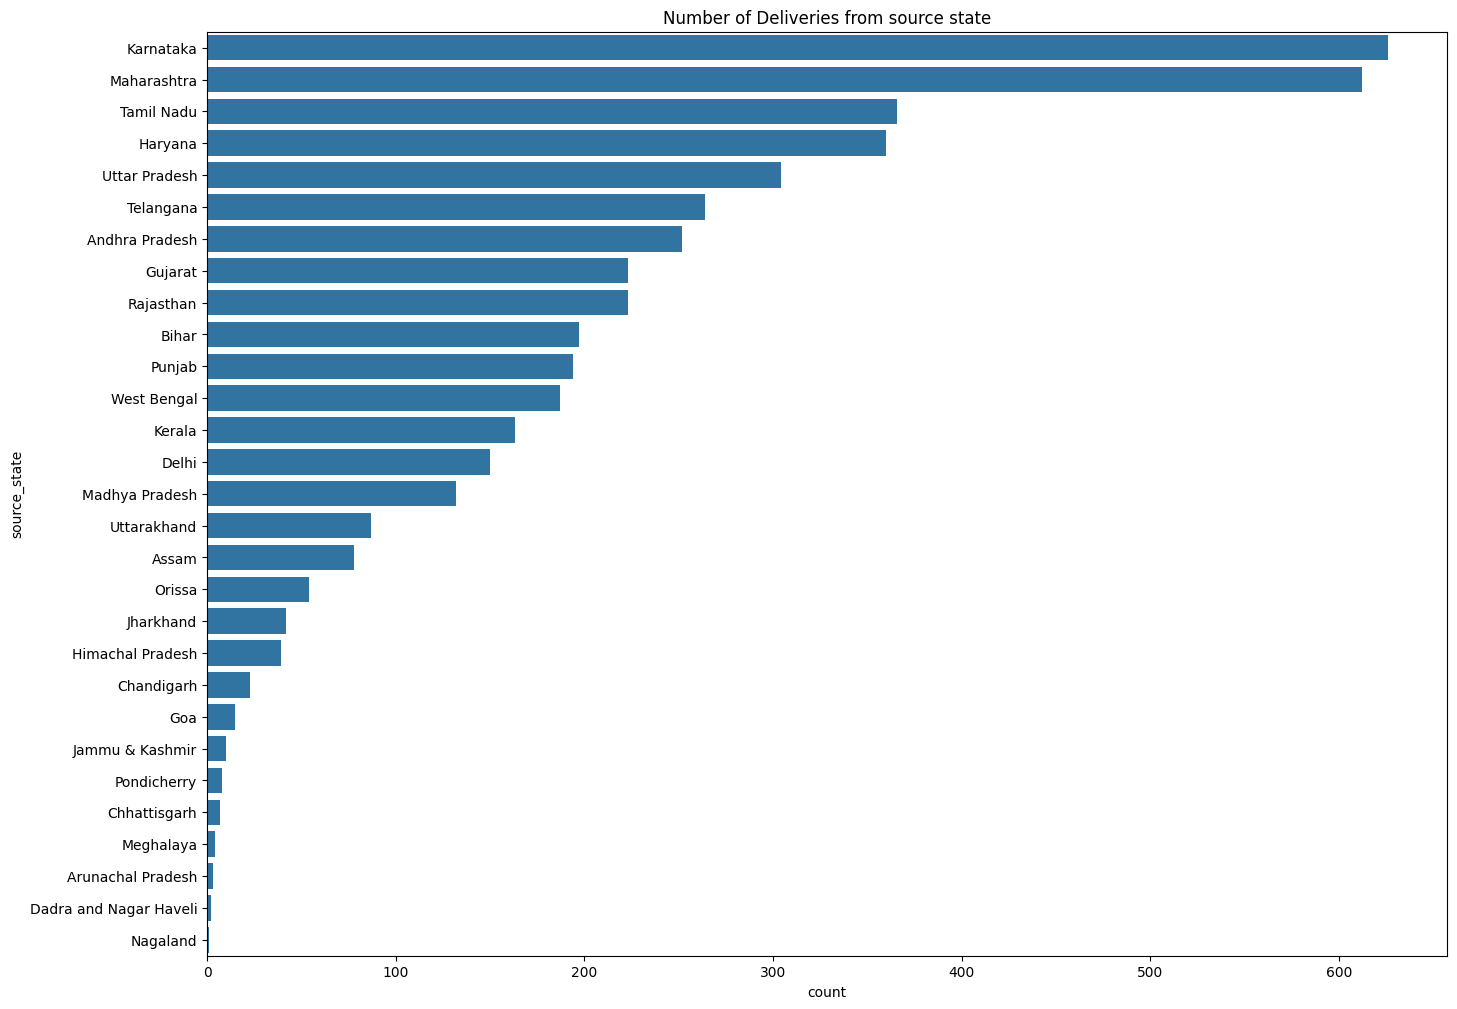

In [47]:
plt.figure(figsize=(16,12))
sns.barplot(x='count',y='source_state',data=statewise_count)
plt.title('Number of Deliveries from source state')

Source states like Maharastra, Karnataka, Haryana, Tamil Nadu and Uttar Pradesh where the major no.of booking are recorded.

In [48]:
citywise_count = dt['source_city'].value_counts().reset_index().head(10)
citywise_count

source_city  count
0   Bengaluru    320
1     Gurgaon    187
2      Mumbai    167
3    Bhiwandi    137
4       Delhi    120
5   Hyderabad    106
6        Pune     89
7  Chandigarh     85
8     Chennai     62
9     Sonipat     61

Text(0.5, 1.0, 'Number of Deliveries from source city')

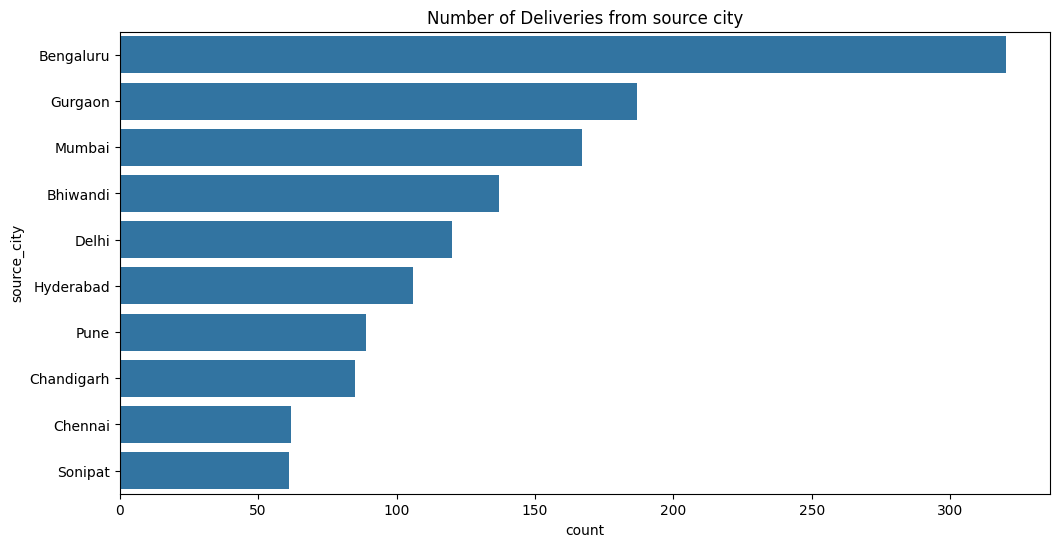

In [49]:
plt.figure(figsize=(12,6))
sns.barplot(x='count',y='source_city',data=citywise_count)
plt.title('Number of Deliveries from source city')

Source cities like Bengaluru, Gurgaon, Mumbai, Bhiwandi and Delhi  where the major no.of booking are recorded.

In [50]:
statewise_dest_count = dt['destination_state'].value_counts().reset_index()
statewise_dest_count

destination_state  count
0                Karnataka    633
1              Maharashtra    607
2               Tamil Nadu    360
3                  Haryana    340
4            Uttar Pradesh    307
5                Telangana    280
6           Andhra Pradesh    253
7                  Gujarat    236
8                Rajasthan    225
9                   Punjab    209
10                   Bihar    197
11             West Bengal    193
12                  Kerala    161
13          Madhya Pradesh    126
14                   Delhi    123
15             Uttarakhand     90
16                   Assam     79
17                  Orissa     57
18        Himachal Pradesh     44
19               Jharkhand     41
20              Chandigarh     17
21                     Goa     14
22         Jammu & Kashmir      9
23             Pondicherry      7
24            Chhattisgarh      7
25  Dadra and Nagar Haveli      5
26               Meghalaya      3
27       Arunachal Pradesh      2

Text(0.5, 1.0, 'Number of Deliveries from destination state')

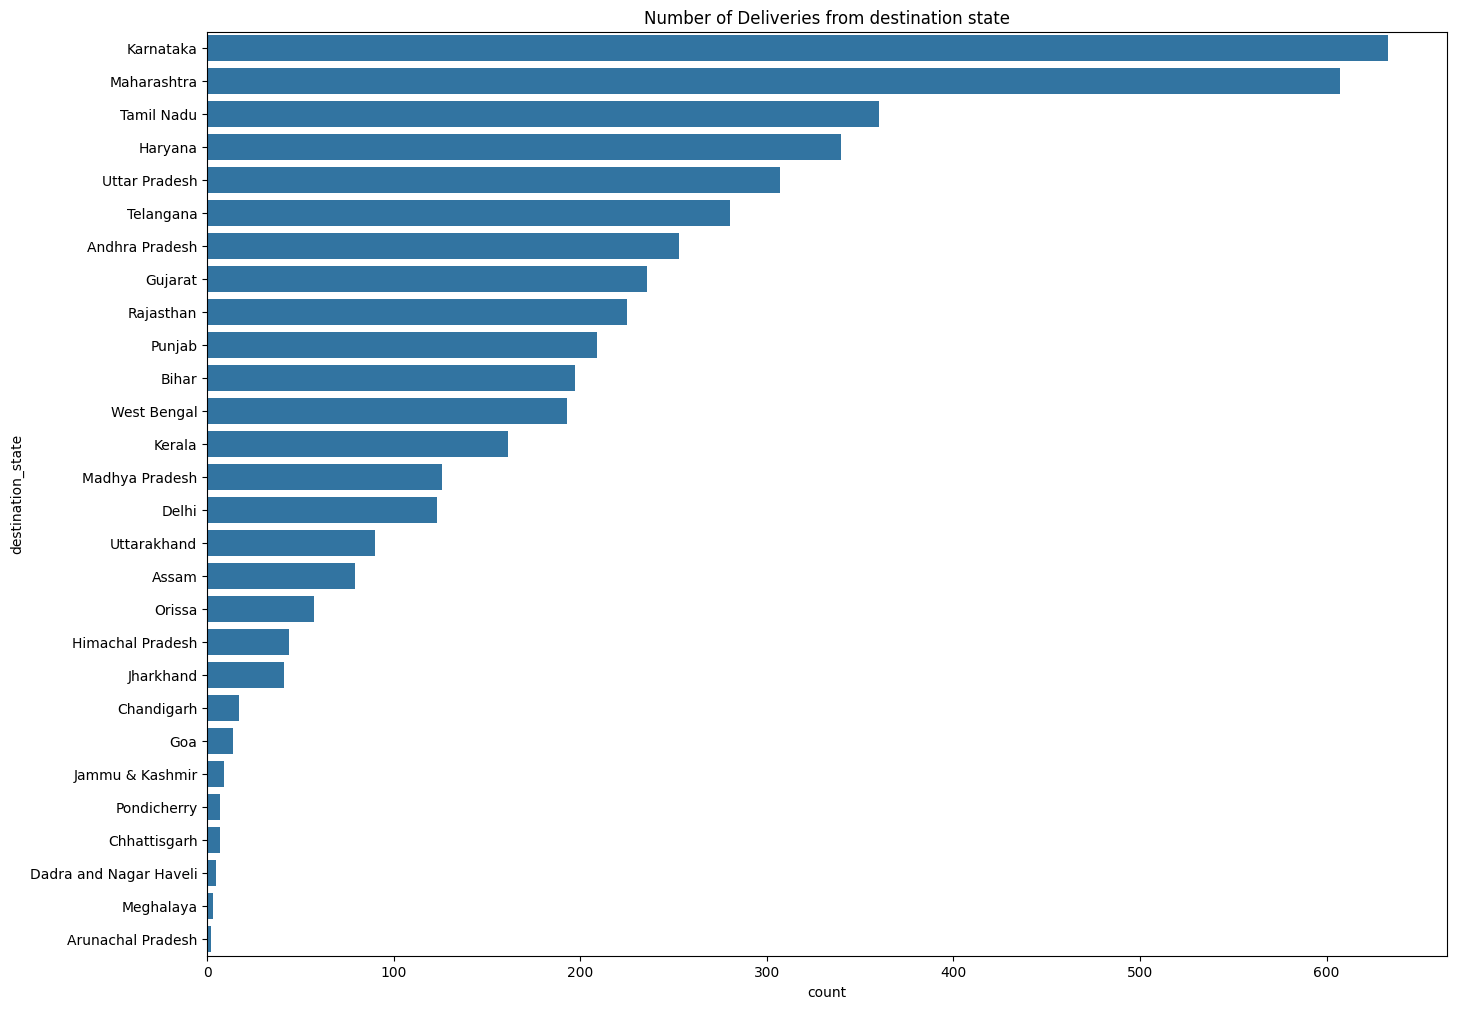

In [51]:
plt.figure(figsize=(16,12))
sns.barplot(x='count',y='destination_state',data=statewise_dest_count)
plt.title('Number of Deliveries from destination state')

Destination states like Karnataka, Maharastra, Haryana, Tamil Nadu and Uttar Pradesh where maximum packages are received in this month indicating significant engagement.

In [52]:
citywise_dest_count = dt['destination_city'].value_counts().reset_index().head(10)
citywise_dest_count

destination_city  count
0        Bengaluru    311
1           Mumbai    213
2          Gurgaon    161
3        Hyderabad    118
4       Chandigarh     98
5            Delhi     95
6         Bhiwandi     94
7             Pune     75
8          Sonipat     72
9          Chennai     71

Text(0.5, 1.0, 'Number of Deliveries in from destination city')

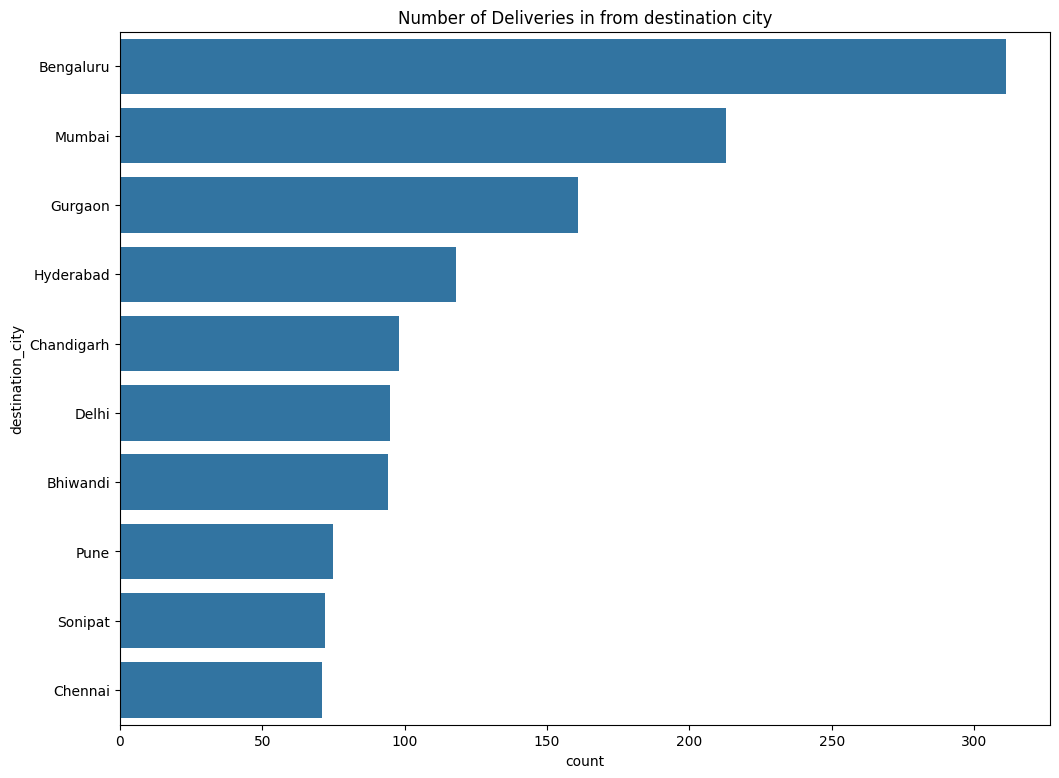

In [53]:
plt.figure(figsize=(12,9))
sns.barplot(x='count',y='destination_city',data=citywise_dest_count)
plt.title('Number of Deliveries in from destination city')

Destination cities like Bengaluru, Mumbai, Gurgaon, Bhiwandi and Hyderabad where the major no.of booking are received.

In [54]:
dt['corridor'] = dt['source_name'] +' <---> '+ dt['destination_name']
dt['corridor'].value_counts()

corridor
Bengaluru_Bomsndra_HB (Karnataka) <---> Bengaluru_KGAirprt_HB (Karnataka)           29
Bhiwandi_Mankoli_HB (Maharashtra) <---> Mumbai Hub (Maharashtra)                    26
Bangalore_Nelmngla_H (Karnataka) <---> Bengaluru_Bomsndra_HB (Karnataka)            26
Delhi_Gateway_HB (Delhi) <---> Gurgaon_Bilaspur_HB (Haryana)                        22
Bangalore_Nelmngla_H (Karnataka) <---> Bengaluru_KGAirprt_HB (Karnataka)            19
                                                                                    ..
Paota_SmClyDPP_D (Rajasthan) <---> Achrol_BgwriDPP_D (Rajasthan)                     1
Achrol_BgwriDPP_D (Rajasthan) <---> Jaipur_Hub (Rajasthan)                           1
Pune_Chinchwad DC (Maharashtra) <---> Pune_East_D_7 (Maharashtra)                    1
Visakhapatnam_Gajuwaka_IP (Andhra Pradesh) <---> Vishakhapatnam (Andhra Pradesh)     1
Uthangarai_RgstrOFC_D (Tamil Nadu) <---> Ambur_Central_D_2 (Tamil Nadu)              1
Name: count, Length: 1730, dtype: int64

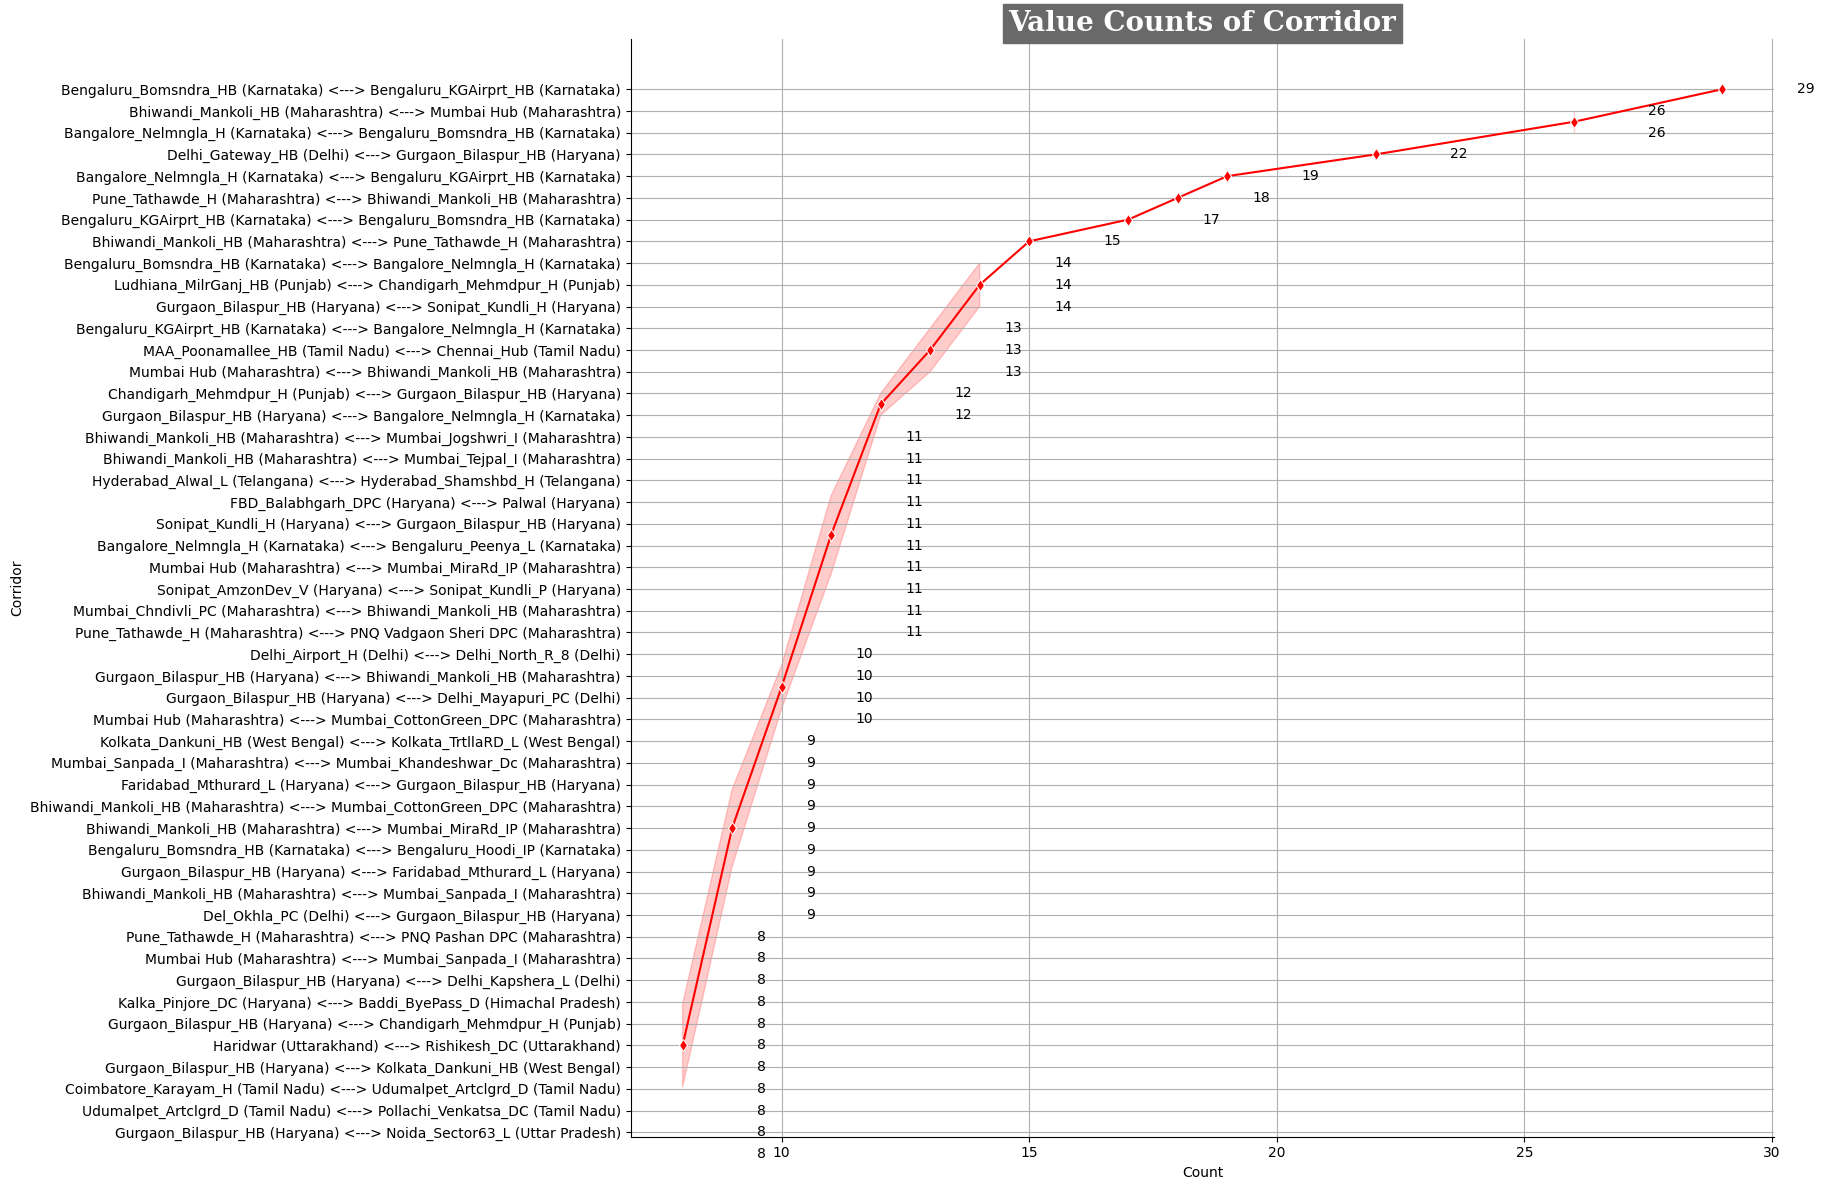

In [55]:
corridor_counts = dt['corridor'].value_counts()[:50]

plt.figure(figsize=(18,12))
#corridor_counts.plot(kind='line', marker='d', color='r')
sns.lineplot(y=corridor_counts.index, x=corridor_counts.values, marker='d', color='r')
plt.title('Value Counts of Corridor',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='dimgrey',color='w')
plt.ylabel('Corridor')
plt.xlabel('Count')
plt.tight_layout()
sns.despine()
plt.grid(True)

for i, count in enumerate(corridor_counts.values):
    plt.text(count+1.5, corridor_counts.index[i], str(count), ha='left', va='center')

plt.show()



*   The route between Bangalore_Nelamangala_H to Bengaluru_KGAirport_HB,Bengaluru_Bomsndra_HB sees the highest package volume, with 84 and 78 packages sent respectively.
*   Pune_Tathawde_H (Maharashtra) to Bhiwandi_Mankoli_HB (Maharashtra) is also popular, with 75 packages sent.


*   Bengaluru_Bomsndra_HB (Karnataka) <---> Bengaluru_KGAirprt_HB (Karnataka) is also popular, with 69 packages sent.
*   The data indicates Bengaluru's importance as a transportation hub Corridor within Karnataka, handling significant package traffic.





In [56]:
dt['state_corridor'] = dt['source_state']+'--'+dt['source_city'] +' <---> '+ dt['destination_state']+'--'+dt['destination_city']
dt['state_corridor'].value_counts()

state_corridor
Karnataka--Bengaluru <---> Karnataka--Bengaluru         243
Maharashtra--Mumbai <---> Maharashtra--Mumbai           107
Maharashtra--Bhiwandi <---> Maharashtra--Mumbai          89
Telangana--Hyderabad <---> Telangana--Hyderabad          63
Maharashtra--Mumbai <---> Maharashtra--Bhiwandi          48
                                                       ... 
Tamil Nadu--Tiruppattur <---> Tamil Nadu--Uthangarai      1
Tamil Nadu--Uthangarai <---> Tamil Nadu--Ambur            1
Punjab--Barnala <---> Punjab--Bhadaur                     1
Uttar Pradesh--Ghaziabad <---> Haryana--Gurgaon           1
West Bengal--Durgapur <---> West Bengal--Barjora          1
Name: count, Length: 1472, dtype: int64

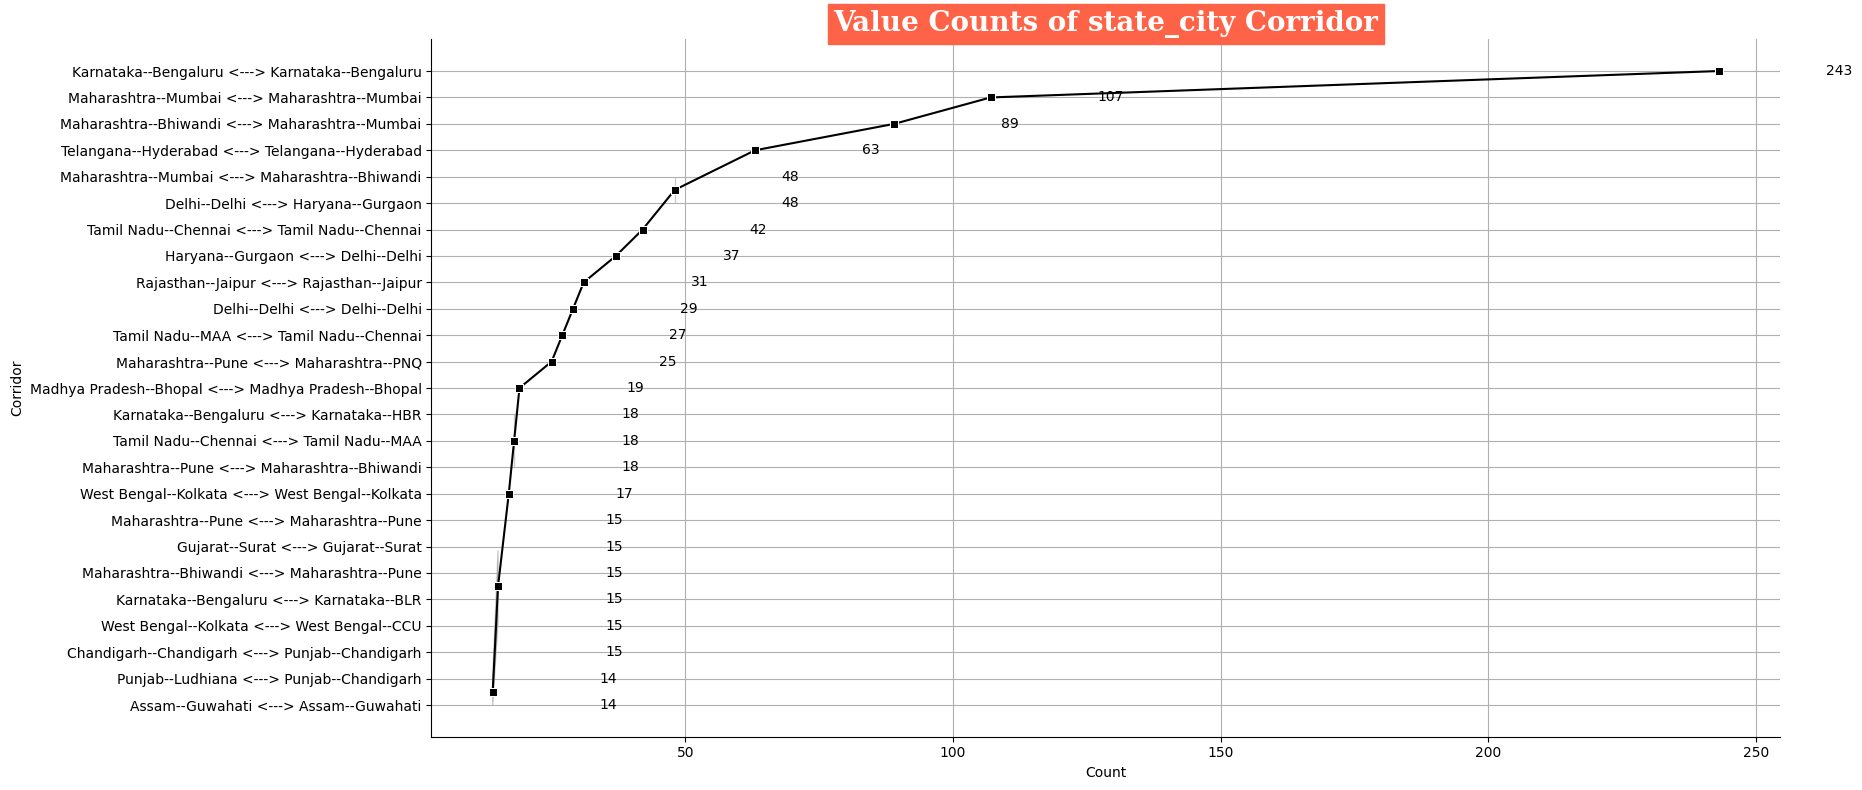

In [57]:
state_corridor_counts = dt['state_corridor'].value_counts()[:25]

plt.figure(figsize=(18,8))
sns.lineplot(y=state_corridor_counts.index, x=state_corridor_counts.values, marker='s', color='k')
plt.title('Value Counts of state_city Corridor',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='tomato',color='w')
plt.ylabel('Corridor')
plt.xlabel('Count')
plt.tight_layout()
sns.despine()
plt.grid(True)

for i, count in enumerate(state_corridor_counts.values):
    plt.text(count+20, state_corridor_counts.index[i], str(count), ha='left', va='center')

plt.show()

In [58]:
# 4. Extracting features like month, year, day, etc. from Trip_creation_time
dt['trip_creation_month'] = dt['trip_creation_time'].dt.month
dt['trip_creation_year'] = dt['trip_creation_time'].dt.year
dt['trip_creation_day'] = dt['trip_creation_time'].dt.day
dt['trip_creation_week'] = dt['trip_creation_time'].dt.day_name()

In [59]:
dt.head()

segment_key                trip_uuid  \
0  trip-153671079956500691IND110024AAAIND110014AAA  trip-153671079956500691   
1  trip-153671110078355292IND121004AABIND121001AAA  trip-153671110078355292   
2  trip-153671191949943656IND487001AABIND487551AAA  trip-153671191949943656   
3  trip-153671191949943656IND487551AAAIND464668AAA  trip-153671191949943656   
4  trip-153671237597058150IND785690AABIND785682AAA  trip-153671237597058150   

       data route_type         trip_creation_time  \
0  training    Carting 2018-09-12 00:06:39.565253   
1  training    Carting 2018-09-12 00:11:40.783923   
2  training        FTL 2018-09-12 00:25:19.499696   
3  training        FTL 2018-09-12 00:25:19.499696   
4  training    Carting 2018-09-12 00:32:55.970840   

                               source_name  \
0                  Delhi_Lajpat_IP (Delhi)   
1             FBD_Balabhgarh_DPC (Haryana)   
2  Narsinghpur_KndliDPP_D (Madhya Pradesh)   
3      Gadarwara_MPward_D (Madhya Pradesh)   
4             Sonari_Central_DPP_1 (Assam)   

                      destination_name              od_start_time  \
0                 Delhi_Bhogal (Delhi) 2018-09-12 00:06:39.565253   
1                  Faridabad (Haryana) 2018-09-12 00:11:40.783923   
2  Gadarwara_MPward_D (Madhya Pradesh) 2018-09-12 04:33:09.726898   
3   Bareli_SourvDPP_D (Madhya Pradesh) 2018-09-12 05:59:13.062416   
4         Sivasagar_Babupaty_D (Assam) 2018-09-12 03:48:42.530167   

                 od_end_time  start_scan_to_end_scan  \
0 2018-09-12 00:55:59.568645                    49.0   
1 2018-09-12 00:50:10.814399                    38.0   
2 2018-09-12 05:59:13.062416                    86.0   
3 2018-09-12 09:23:49.463096                   204.0   
4 2018-09-12 08:00:47.150111                   252.0   

   actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                        9.872146         23.0        8.0         9.9566   
1                        9.396526         17.0        9.0        10.8159   
2                       42.630333         78.0       42.0        48.4129   
3                       57.345262        175.0       63.0        76.0934   
4                       39.495954        241.0       33.0        46.9087   

   segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0                 23.0               14.0                16.0860   
1                 17.0                9.0                10.8159   
2                 78.0               41.0                48.4129   
3                174.0               91.0                92.1494   
4                240.0               49.0                56.7577   

   segment_actual_time_sum  segment_osrm_time_sum  segment_osrm_distance_sum  \
0                     23.0                   14.0                    16.0860   
1                     17.0                    9.0                    10.8159   
2                     78.0                   41.0                    48.4129   
3                    174.0                   91.0                    92.1494   
4                    240.0                   49.0                    56.7577   

   od_total_time  source_city    source_place    source_state  \
0       0.822223        Delhi       Lajpat_IP           Delhi   
1       0.641675          FBD  Balabhgarh_DPC         Haryana   
2       1.434260  Narsinghpur      KndliDPP_D  Madhya Pradesh   
3       3.410111    Gadarwara        MPward_D  Madhya Pradesh   
4       4.201283       Sonari   Central_DPP_1           Assam   

  destination_city destination_place destination_state  \
0            Delhi            Bhogal             Delhi   
1        Faridabad         Faridabad           Haryana   
2        Gadarwara          MPward_D    Madhya Pradesh   
3           Bareli        SourvDPP_D    Madhya Pradesh   
4        Sivasagar        Babupaty_D             Assam   

                                            corridor  \
0  Delhi_Lajpat_IP (Delhi) <---> Delhi_Bhogal (De...   
1  FBD_Balabhgarh

In [60]:
trip_creation_month = dt['trip_creation_month'].value_counts().reset_index()
trip_creation_month

trip_creation_month  count
0                    9   4131
1                   10    495

Text(0.5, 1.0, 'Number of Deliveries per month')

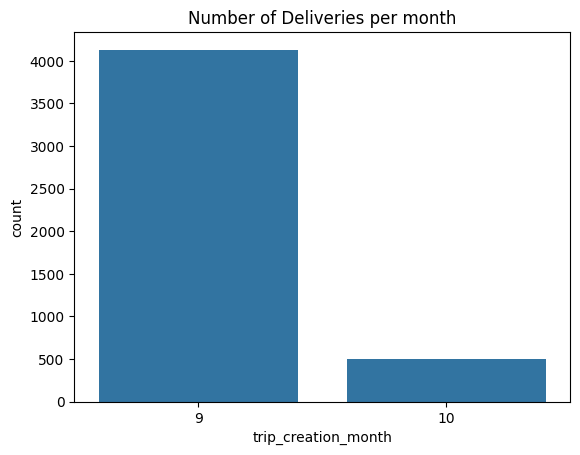

In [61]:
sns.barplot(x='trip_creation_month',y='count',data=trip_creation_month)
plt.title('Number of Deliveries per month')

Most of the deliveries occured in the 9th Month.

In [62]:
trip_creation_year = dt['trip_creation_year'].value_counts().reset_index()
trip_creation_year

trip_creation_year  count
0                2018   4626

In [63]:
trip_creation_day = dt['trip_creation_day'].value_counts().reset_index()
trip_creation_day

trip_creation_day  count
0                  20    262
1                  14    261
2                  25    258
3                  22    254
4                  21    254
5                  17    244
6                  18    234
7                  15    221
8                  24    218
9                  12    215
10                 13    211
11                 16    209
12                 26    202
13                 23    195
14                 27    195
15                 28    189
16                  3    177
17                 29    173
18                  2    171
19                 30    170
20                 19    166
21                  1    147

Text(0.5, 1.0, 'Number of Deliveries per day')

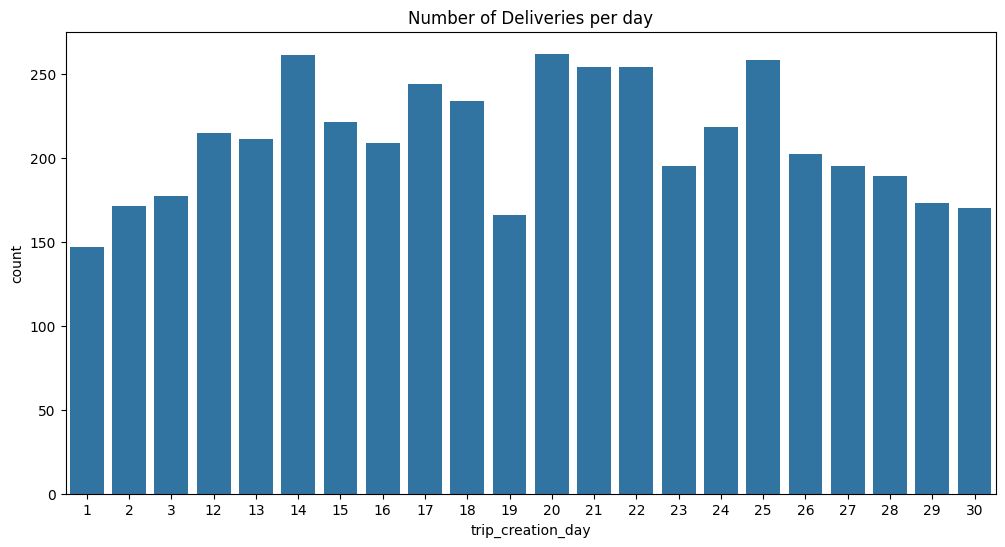

In [64]:
plt.figure(figsize=(12,6))
sns.barplot(x='trip_creation_day',y='count',data=trip_creation_day)
plt.title('Number of Deliveries per day')

In [65]:
trip_creation_week = dt['trip_creation_week'].value_counts().reset_index()
trip_creation_week

trip_creation_week  count
0          Wednesday    760
1             Friday    704
2           Thursday    668
3            Tuesday    663
4           Saturday    648
5             Monday    609
6             Sunday    574

<Axes: xlabel='trip_creation_week', ylabel='count'>

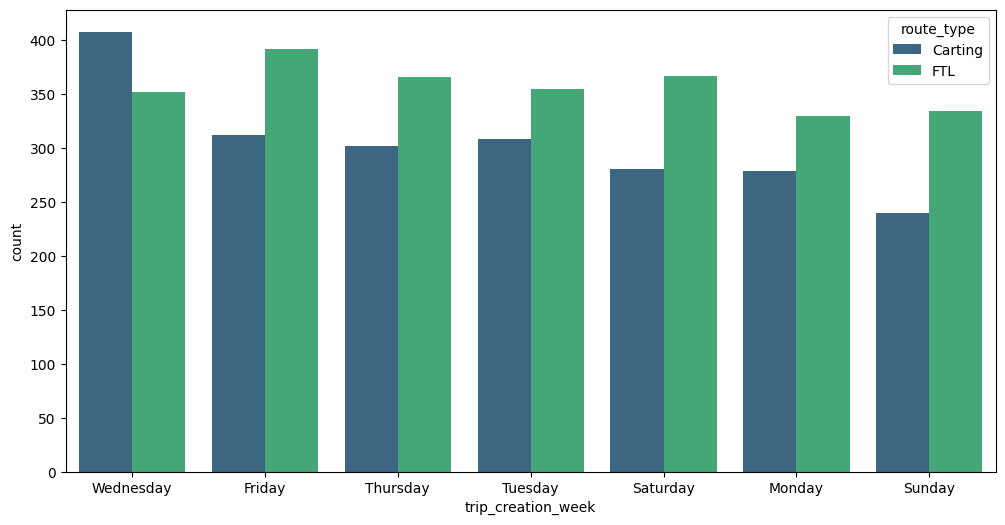

In [66]:
plt.figure(figsize=(12,6))
sns.countplot(x=dt['trip_creation_week'],palette='viridis',order=dt['trip_creation_week'].value_counts().index,hue=dt['route_type'])

The highest number of deliveries occurred on Wednesday, primarily using the FTL and carting route type.

Text(0.5, 1.0, 'Top 5 source names')

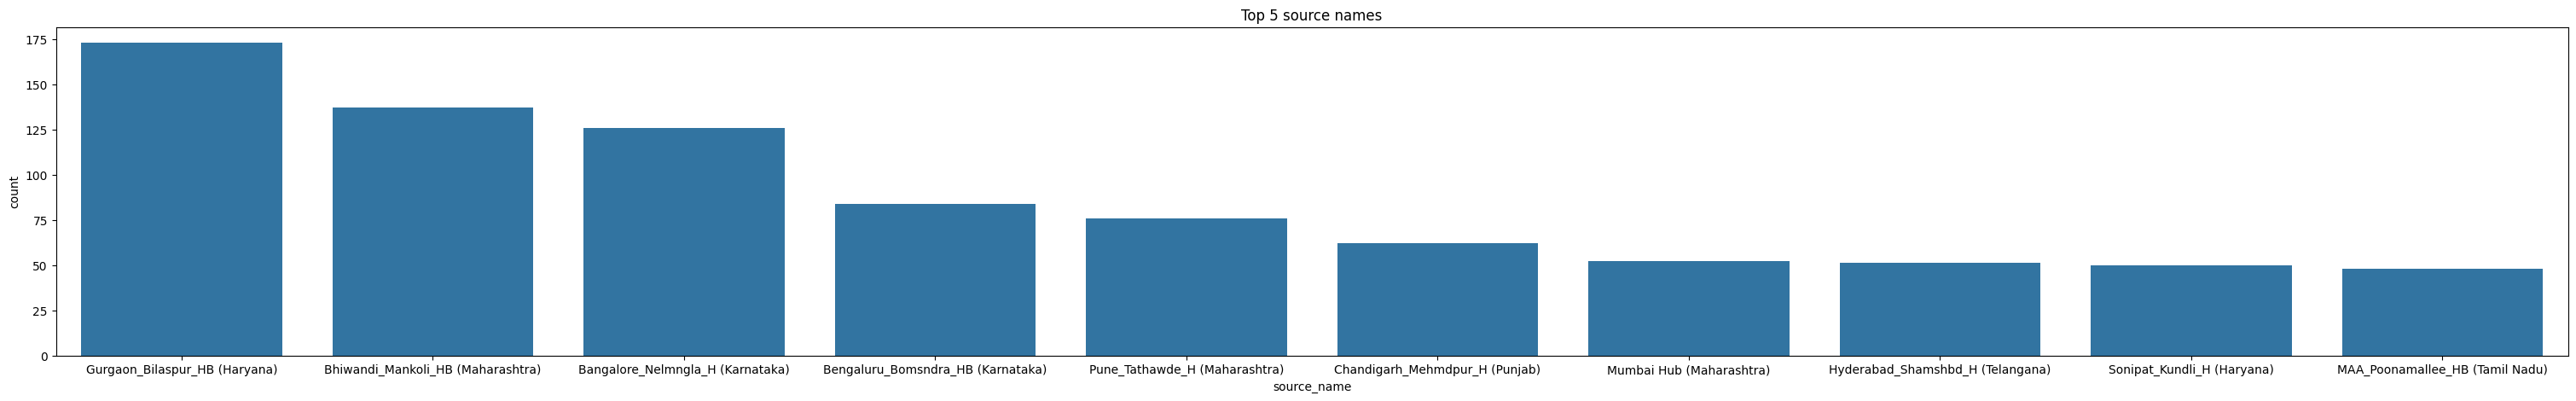

In [67]:
plt.figure(figsize=(38,5))
sns.countplot(x=dt['source_name'],order=dt['source_name'].value_counts().head(10).index)
plt.title('Top 5 source names')

Text(0.5, 1.0, 'Top 5 destination names')

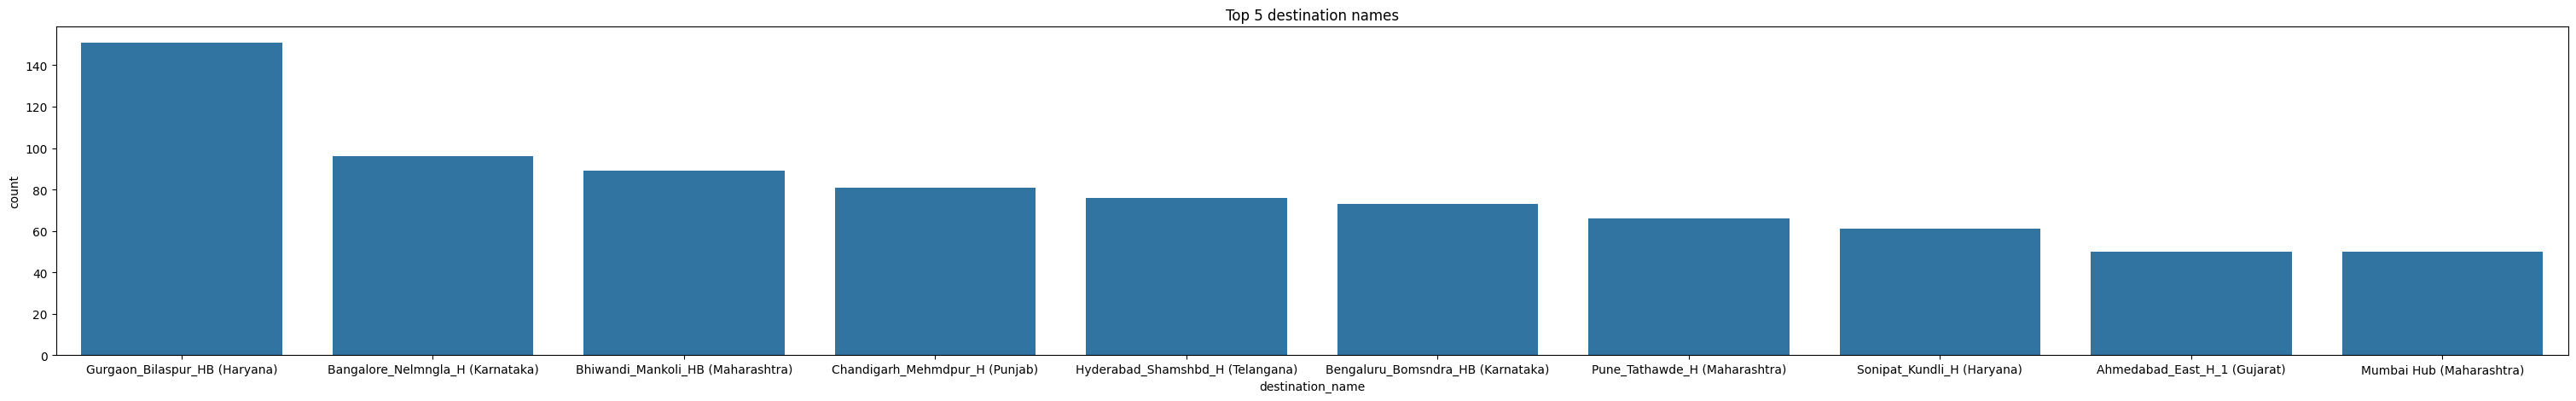

In [68]:
plt.figure(figsize=(38,5))
sns.countplot(x=dt['destination_name'],order=dt['destination_name'].value_counts().head(10).index)
plt.title('Top 5 destination names')

In [69]:
numerical_dt = dt.select_dtypes(include=['float64','int32'])
numerical_dt.shape

(4626, 15)

In [70]:
dt.shape

(4626, 33)

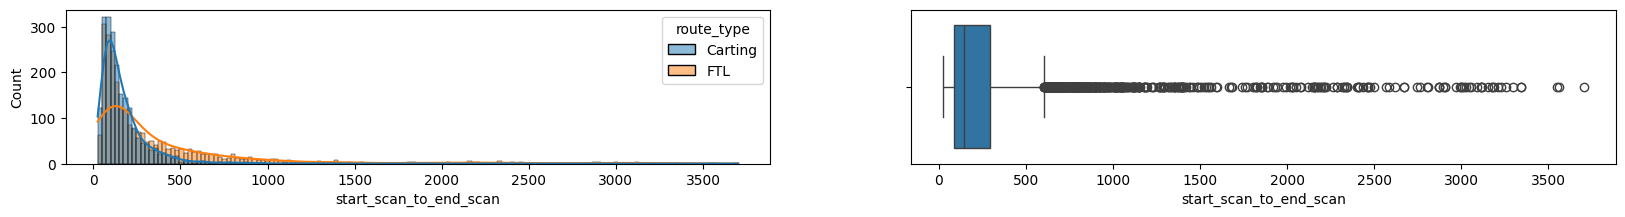

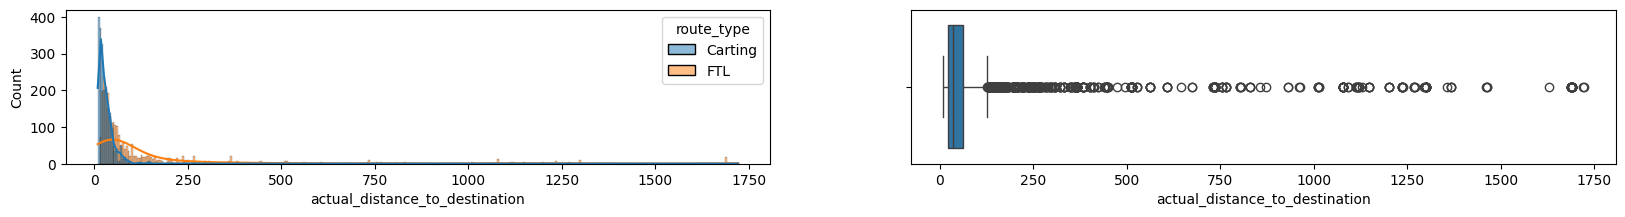

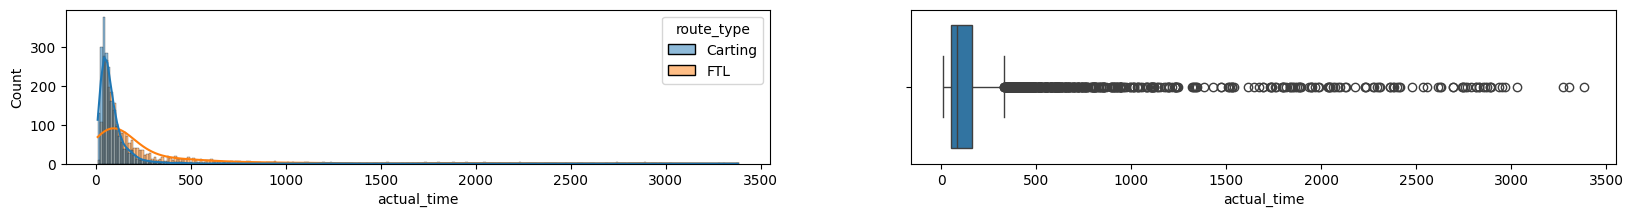

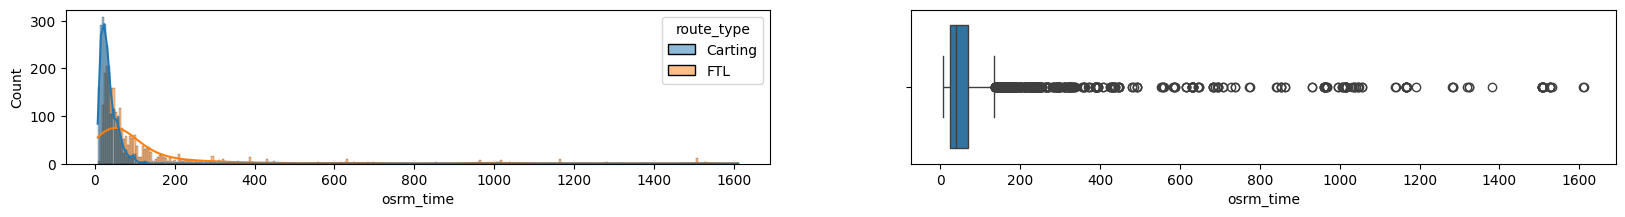

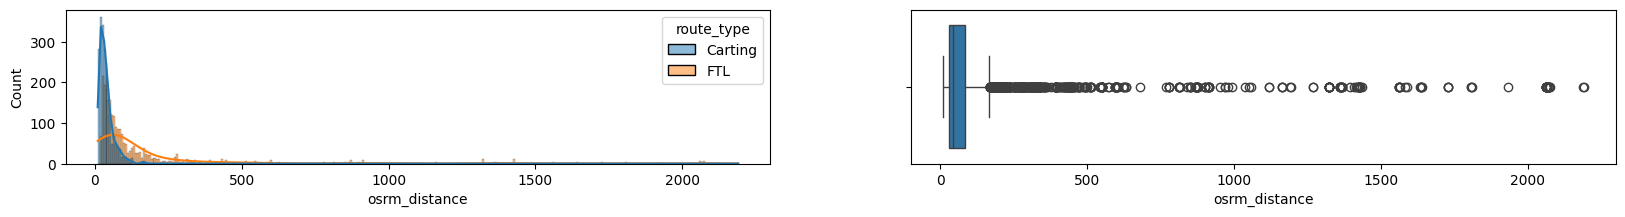

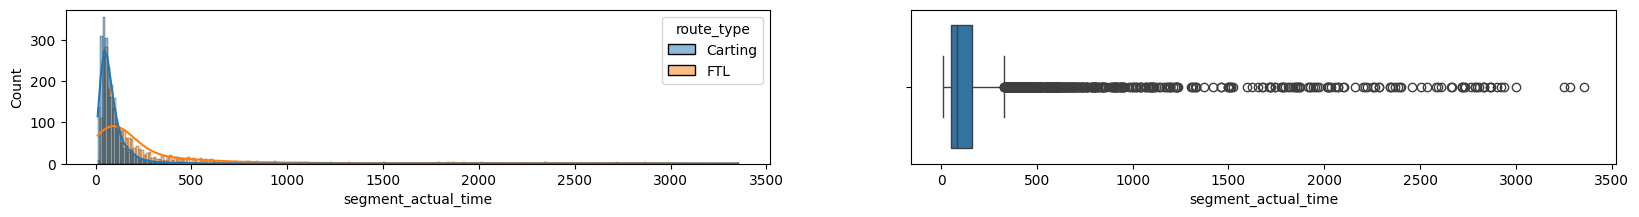

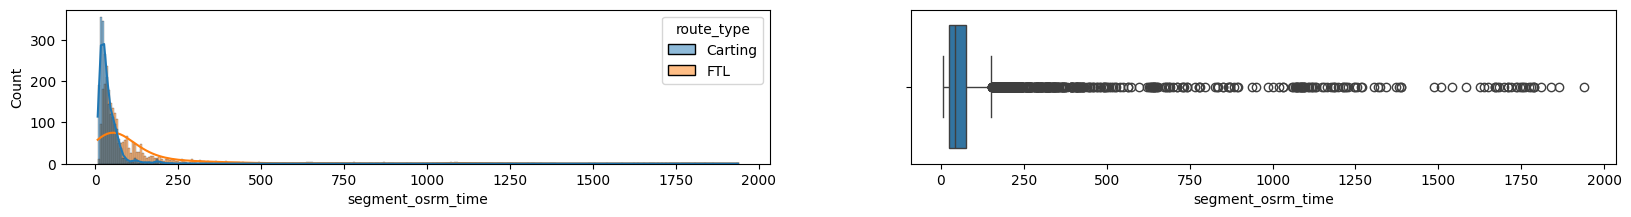

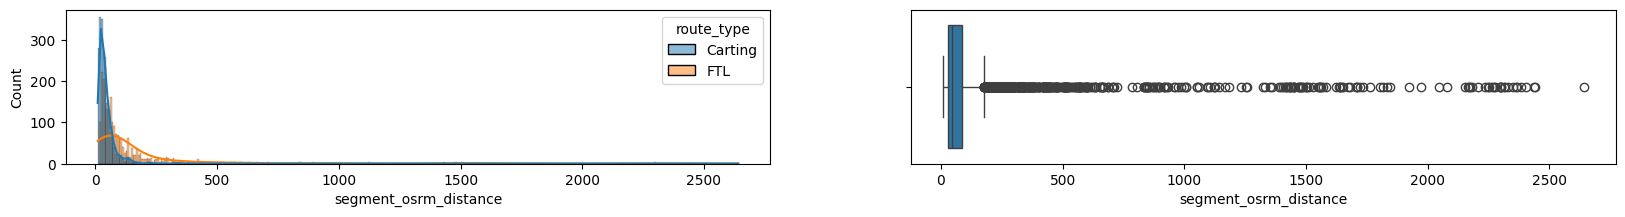

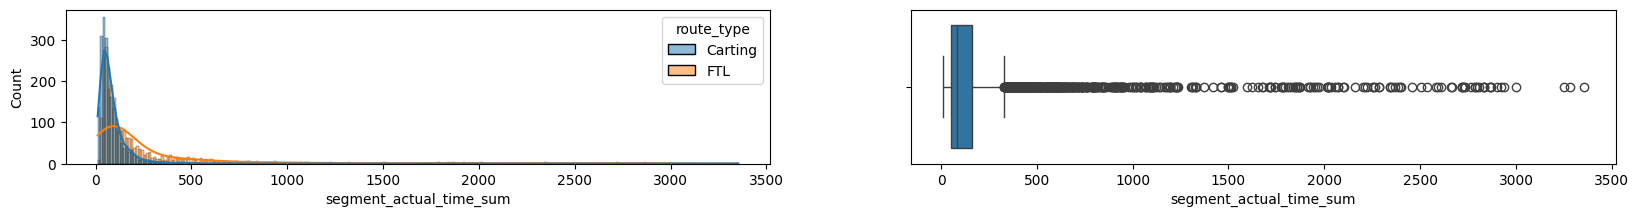

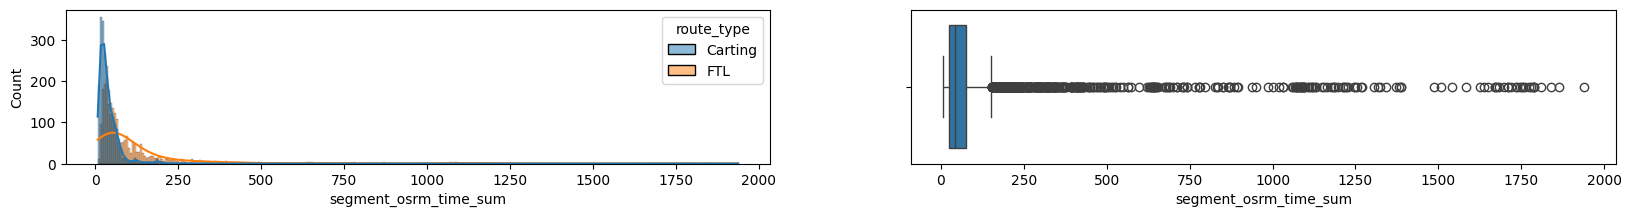

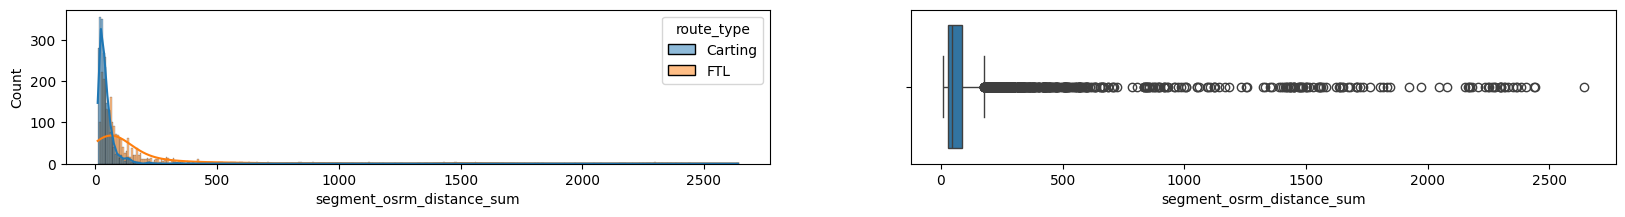

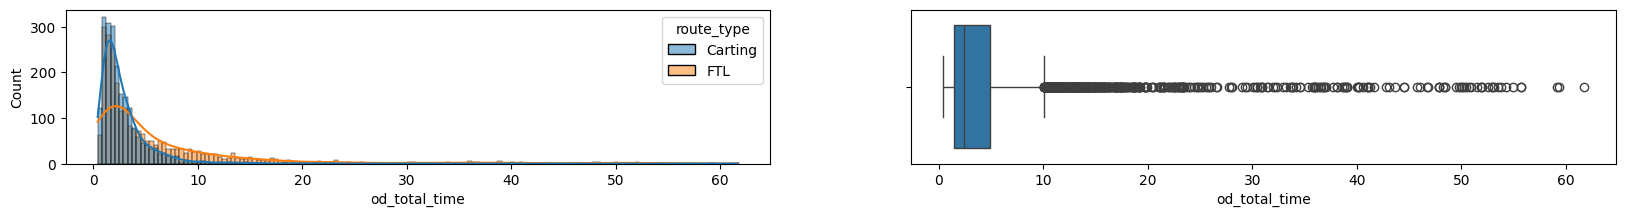

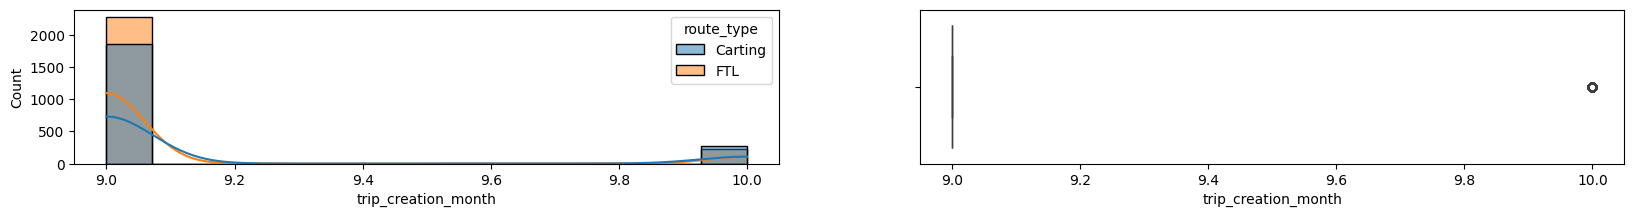

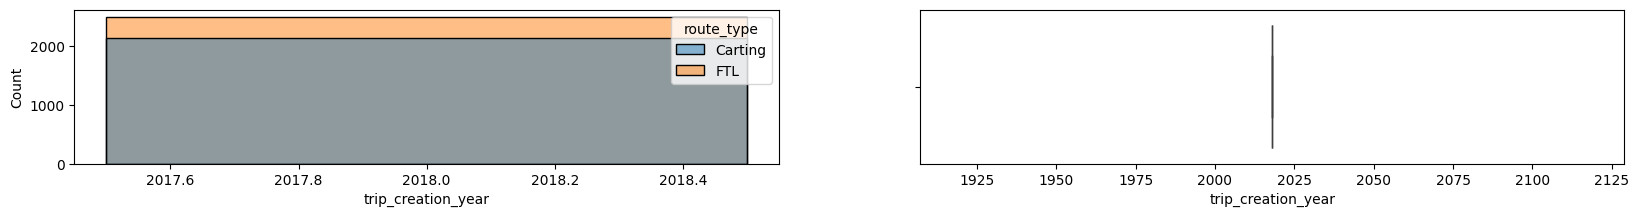

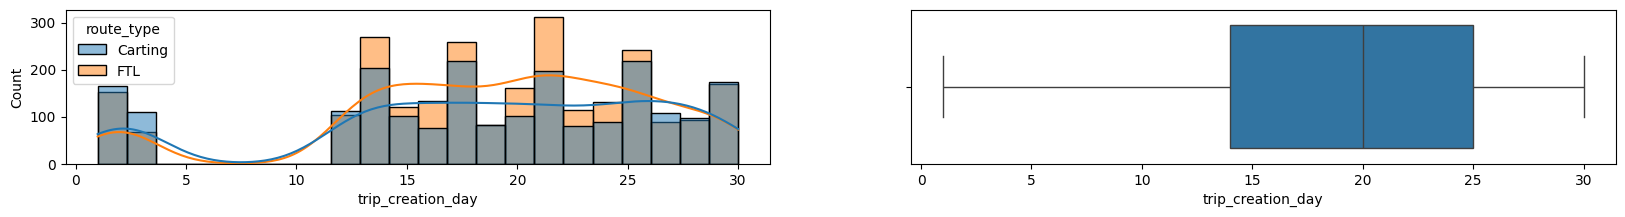

In [71]:
for i in numerical_dt:
  plt.figure(figsize=(20,2))
  plt.subplot(1,2,1)
  sns.histplot(data=numerical_dt,x=i,kde=True,hue=dt['route_type'])
  plt.subplot(1,2,2)
  sns.boxplot(data=numerical_dt,x=i)

#Hypothesis Testing

Statement : Compare the difference between Point a. and start_scan_to_end_scan.

Null Hypothesis :
→ There is no significant difference between start_scan_to_end_scan and od_total_time.
(They are about the same)

Alternative Hypothesis :
→ There is a significant difference between start_scan_to_end_scan and od_total_time.

In [72]:
dt['start_scan_to_end_scan'].describe()

count    4626.000000
mean      283.314527
std       411.861036
min        25.000000
25%        88.000000
50%       147.000000
75%       294.000000
max      3702.000000
Name: start_scan_to_end_scan, dtype: float64

In [73]:
dt['od_total_time'].describe()

count    4626.000000
mean        4.730231
std         6.864274
min         0.420509
25%         1.479926
50%         2.454968
75%         4.909928
max        61.716212
Name: od_total_time, dtype: float64

In [74]:
# log transormation
hypo_1 = np.log(dt['start_scan_to_end_scan'])
hypo_2 = np.log(dt['od_total_time'])

Text(0.5, 1.0, 'Histplot of (log(start_scan_to_end_scan))')

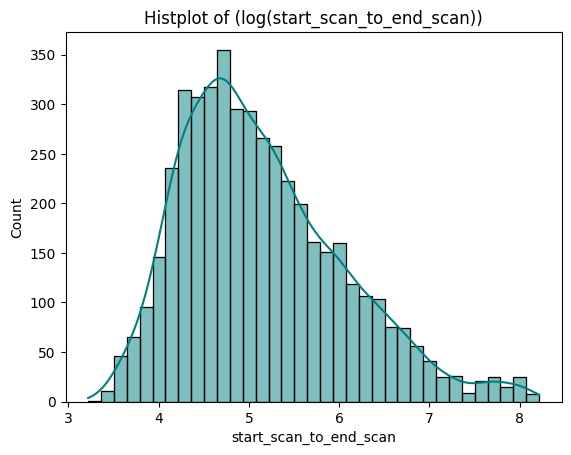

In [75]:
#Distribution of data check
sns.histplot(hypo_1, kde=True,color='teal')
plt.title('Histplot of (log(start_scan_to_end_scan))')

Text(0.5, 1.0, 'QQPlot of (log(start_scan_to_end_scan))')

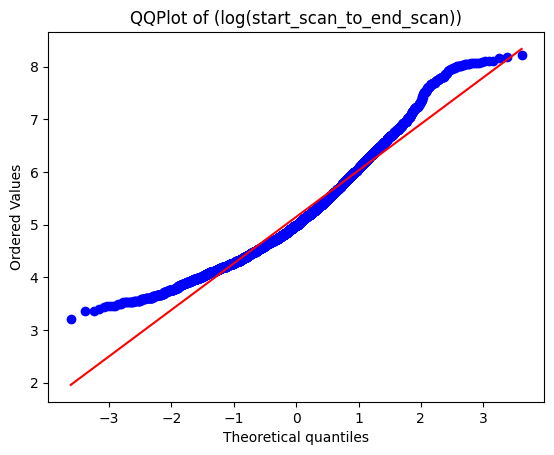

In [76]:
stats.probplot(hypo_1, dist="norm", plot=plt)
plt.title('QQPlot of (log(start_scan_to_end_scan))')

Above graph seems like the data is not normally distributed.

Text(0.5, 1.0, 'Histplot of (log(od_total_time))')

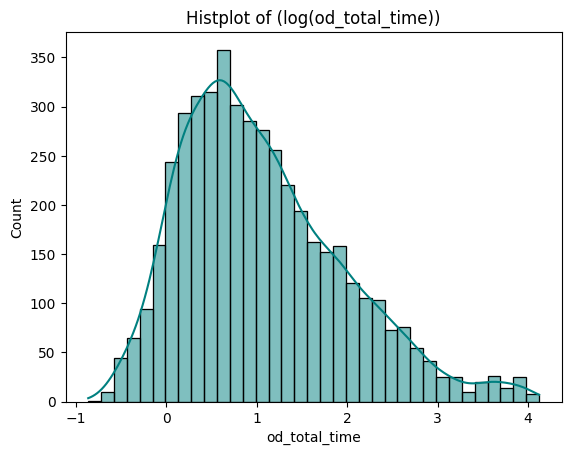

In [77]:
sns.histplot(hypo_2, kde=True,color='teal')
plt.title('Histplot of (log(od_total_time))')

Text(0.5, 1.0, 'QQPlot of (log(od_total_time))')

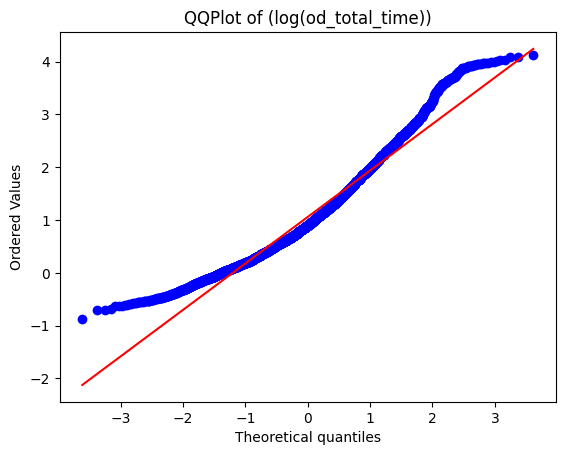

In [78]:
stats.probplot(hypo_2, dist="norm", plot=plt)
plt.title('QQPlot of (log(od_total_time))')

#Shapiro-Wilk test

In [79]:
stat, p_value = shapiro(hypo_1)

print('Test Statistic:', stat)
print('P-value:', p_value)

Test Statistic: 0.9587588176205581
P-value: 2.4415048637418372e-34


In [80]:
if p_value > 0.05:
  print('Data is normally distributed')
else:
  print('Data is not normally distributed')

Data is not normally distributed


In [81]:
stat, p_value = shapiro(hypo_2)

print('Test Statistic:', stat)
print('P-value:', p_value)


Test Statistic: 0.9581706258088609
P-value: 1.549706221552075e-34


In [82]:
if p_value > 0.05:
  print('Data is normally distributed')
else:
  print('Data is not normally distributed')

Data is not normally distributed


#Select the Appropirate Test

#Defining the significance level

The significance value, for this hypothesis would be 0.05.

#Wilcoxon Signed-Rank Test

#Calculating the p_value

In [83]:
stat, p_value = wilcoxon(np.log(dt['start_scan_to_end_scan']), np.log(dt['od_total_time']))

print('Wilcoxon Test Statistic:', stat)
print('P-value:', p_value)

Wilcoxon Test Statistic: 0.0
P-value: 0.0


In [84]:
if p_value > 0.05:
  print('There is no significant difference between start_scan_to_end_scan and od_total_time.')
else:
  print('There is a significant difference between start_scan_to_end_scan and od_total_time.')

There is a significant difference between start_scan_to_end_scan and od_total_time.


#Conclusion :
Based on the Wilcoxon Signed-Rank Test (p < 0.05), there is a statistically significant difference between the start_scan_to_end_scan and od_total_time.

#Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

Statement : Hypothesis Testing on actual_time aggregated value and OSRM time aggregated value.


Null Hypothesis : → actual_time and osrm_time have the same mean.

Alternative Hypothesis : → actual_time and osrm_time does not have the same mean.

Text(0.5, 1.0, 'Histplot of (log(actual_time))')

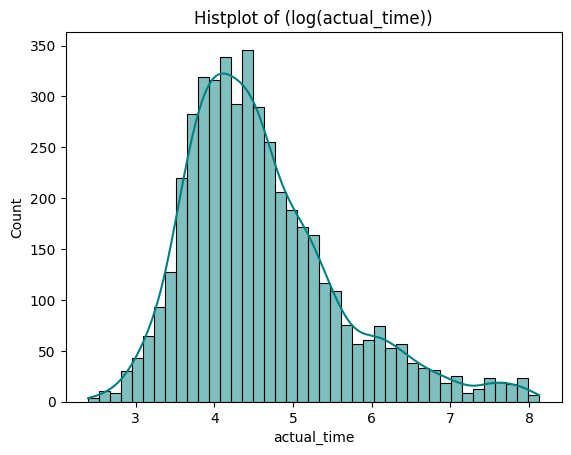

In [85]:
#Distribution of data check
sns.histplot(np.log(dt['actual_time']), kde=True,color='teal')
plt.title('Histplot of (log(actual_time))')

Text(0.5, 1.0, 'QQPlot of (log(actual_time))')

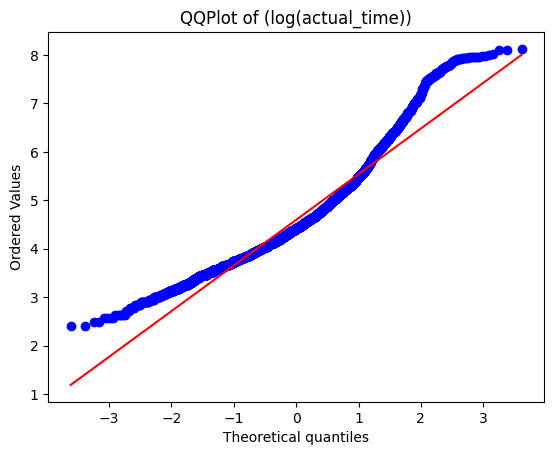

In [86]:
stats.probplot(np.log(dt['actual_time']), dist="norm", plot=plt)
plt.title('QQPlot of (log(actual_time))')

Text(0.5, 1.0, 'Histplot of (log(osrm_time))')

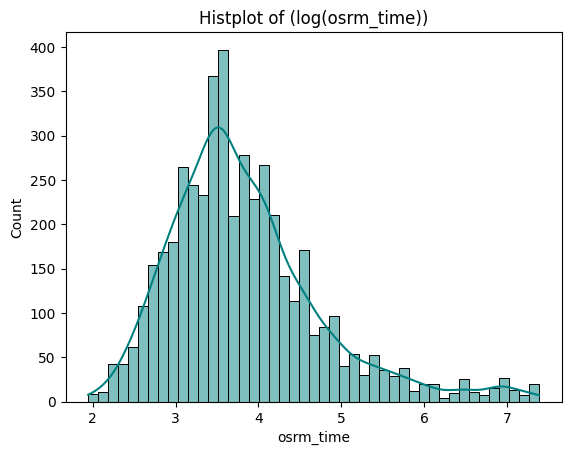

In [87]:
sns.histplot(np.log(dt['osrm_time']), kde=True,color='teal')
plt.title('Histplot of (log(osrm_time))')

Text(0.5, 1.0, 'QQPlot of (log(osrm_time))')

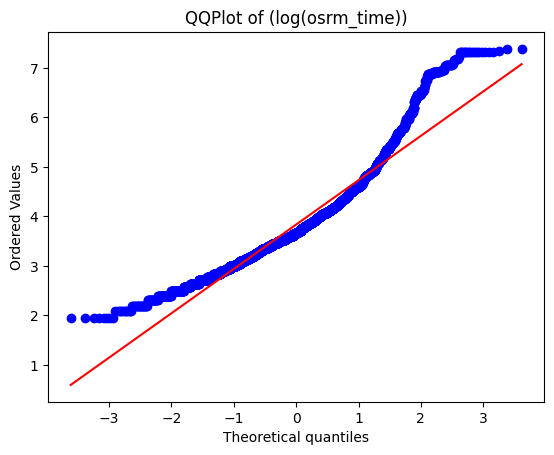

In [88]:
stats.probplot(np.log(dt['osrm_time']), dist="norm", plot=plt)
plt.title('QQPlot of (log(osrm_time))')

In [89]:
stat, p_value = shapiro(np.log(dt['actual_time']))

print('Test Statistic:', stat)
print('P-value:', p_value)

Test Statistic: 0.9389442005955682
P-value: 5.000061779981312e-40


In [90]:
if p_value > 0.05:
  print('Data is normally distributed')
else:
  print('Data is not normally distributed')

Data is not normally distributed


In [91]:
stat, p_value = shapiro(np.log(dt['osrm_time']))

print('Test Statistic:', stat)
print('P-value:', p_value)

Test Statistic: 0.9280433766003446
P-value: 1.520180615303698e-42


In [92]:
if p_value > 0.05:
  print('Data is normally distributed')
else:
  print('Data is not normally distributed')

Data is not normally distributed


#Select the Appropirate Test


#Defining the significance level

The significance value, for this hypothesis would be 0.0

#Wilcoxon Signed-Rank Test

#Calculating the p_value

In [93]:
stat, p_value = wilcoxon(np.log(dt['actual_time']), np.log(dt['osrm_time']))

print('Wilcoxon Test Statistic:', stat)
print('P-value:', p_value)

Wilcoxon Test Statistic: 27936.5
P-value: 0.0


In [94]:
if p_value > 0.05:
  print('actual_time and osrm_time have the same mean.')
else:
  print('actual_time and osrm_time does not have the same mean.')

actual_time and osrm_time does not have the same mean.


#Conclusion :
Based on the Wilcoxon Signed-Rank Test (p < 0.05), actual_time and osrm_time does not have the same mean.

Statement : Hypothesis Testing on actual_time aggregated value and segment actual time aggregated value.

Null Hypothesis : → actual_time aggregated value and segment actual time aggregated value have the same mean.

Alternative Hypothesis : → actual_time aggregated value and segment actual time aggregated value does not have the same mean.

Text(0.5, 1.0, 'Histplot of (log(segment_actual_time))')

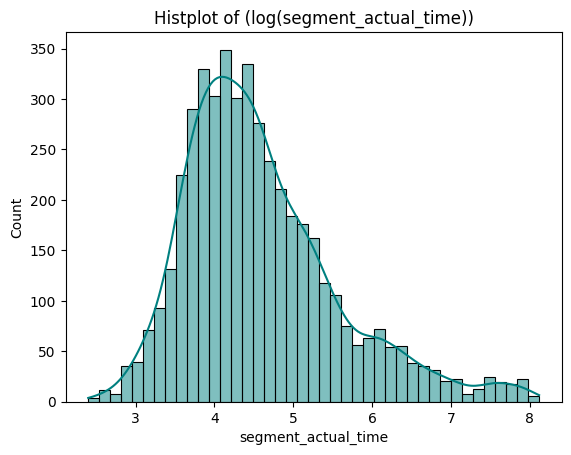

In [95]:
sns.histplot(np.log(dt['segment_actual_time']), kde=True,color='teal')
plt.title('Histplot of (log(segment_actual_time))')

Text(0.5, 1.0, 'QQPlot of (log(segment_actual_time))')

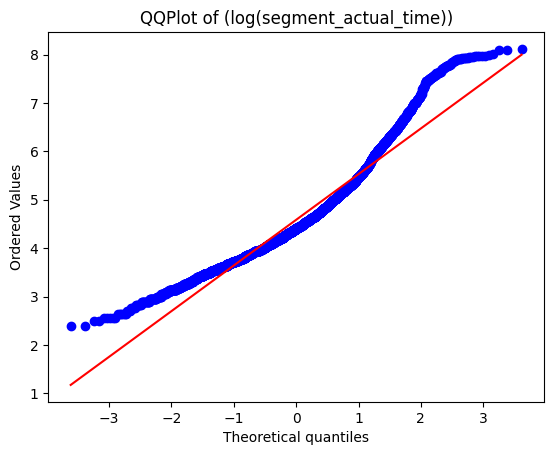

In [96]:
stats.probplot(np.log(dt['segment_actual_time']), dist="norm", plot=plt)
plt.title('QQPlot of (log(segment_actual_time))')

In [97]:
stat, p_value = shapiro(np.log(dt['segment_actual_time']))

print('Test Statistic:', stat)
print('P-value:', p_value)

Test Statistic: 0.9390154876076497
P-value: 5.207026103270743e-40


In [98]:
if p_value > 0.05:
  print('Data is normally distributed')
else:
  print('Data is not normally distributed')

Data is not normally distributed


#Select the Appropirate Test


#Defining the significance level

The significance value, for this hypothesis would be 0.0

#Wilcoxon Signed-Rank Test

#Calculating the P value

In [99]:
stat, p_value = wilcoxon(np.log(dt['actual_time']), np.log(dt['segment_actual_time']))

print('Wilcoxon Test Statistic:', stat)
print('P-value:', p_value)

Wilcoxon Test Statistic: 0.0
P-value: 0.0


In [100]:
if p_value > 0.05:
  print('actual_time and segment_actual_time have the same mean.')
else:
  print('actual_time and segment_actual_time does not have the same mean.')

actual_time and segment_actual_time does not have the same mean.


#Conclusion :
Based on the Wilcoxon Signed-Rank Test (p < 0.05), actual_time and segment_actual_time does not have the same mean.

Statement : Hypothesis Testing on osrm distance aggregated value and segment osrm distance aggregated value.



Null Hypothesis : → osrm distance and segment osrm distance have the same mean.

Alternative Hypothesis : → osrm distance and segment osrm distance does not have the same mean.

Text(0.5, 1.0, 'Histplot of (log(osrm_distance))')

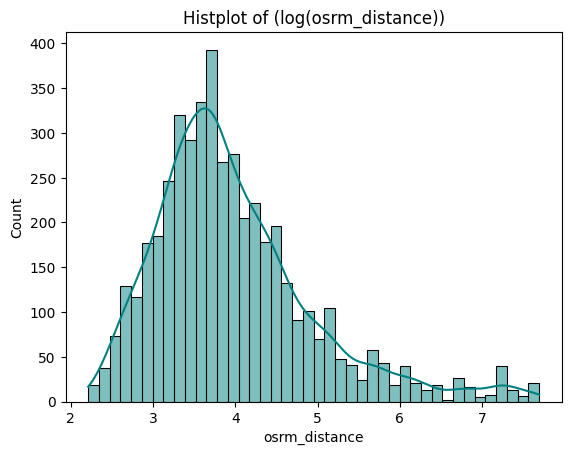

In [101]:
sns.histplot(np.log(dt['osrm_distance']), kde=True,color='teal')
plt.title('Histplot of (log(osrm_distance))')

Text(0.5, 1.0, 'QQPlot of (log(osrm_distance))')

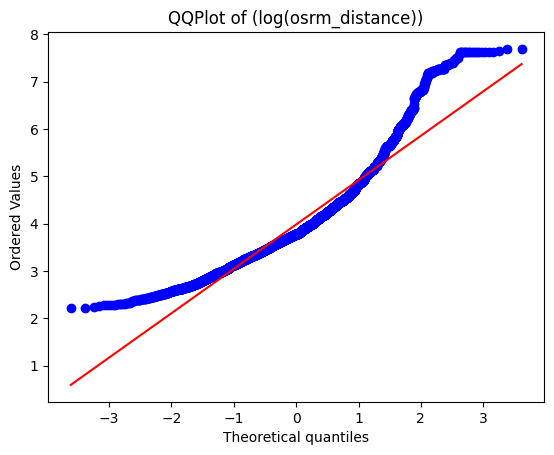

In [102]:
stats.probplot(np.log(dt['osrm_distance']), dist="norm", plot=plt)
plt.title('QQPlot of (log(osrm_distance))')

Text(0.5, 1.0, 'Histplot of (log(segment_osrm_distance))')

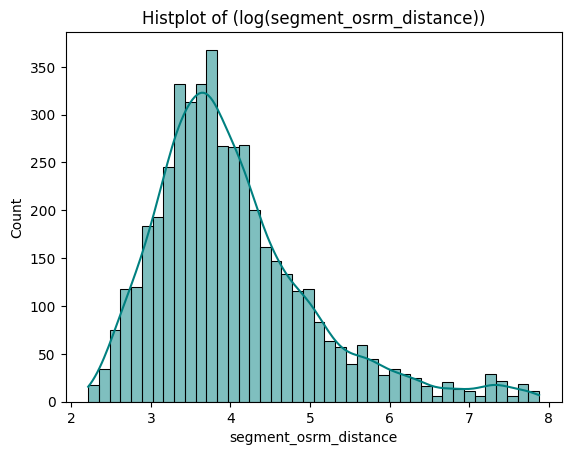

In [103]:
sns.histplot(np.log(dt['segment_osrm_distance']), kde=True,color='teal')
plt.title('Histplot of (log(segment_osrm_distance))')

Text(0.5, 1.0, 'QQPlot of (log(segment_osrm_distance))')

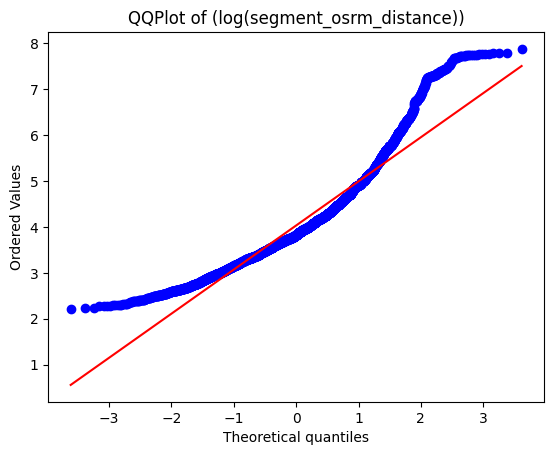

In [104]:
stats.probplot(np.log(dt['segment_osrm_distance']), dist="norm", plot=plt)
plt.title('QQPlot of (log(segment_osrm_distance))')

In [105]:
stat, p_value = shapiro(np.log(dt['osrm_distance']))

print('Test Statistic:', stat)
print('P-value:', p_value)

Test Statistic: 0.9179170291831
P-value: 1.2787394804373912e-44


In [106]:
if p_value > 0.05:
  print('Data is normally distributed')
else:
  print('Data is not normally distributed')

Data is not normally distributed


In [107]:
stat, p_value = shapiro(np.log(dt['segment_osrm_distance']))

print('Test Statistic:', stat)
print('P-value:', p_value)

Test Statistic: 0.9198934061006634
P-value: 3.1244187907747783e-44


In [108]:
if p_value > 0.05:
  print('Data is normally distributed')
else:
  print('Data is not normally distributed')

Data is not normally distributed


#Select the Appropirate Test


#Defining the significance level

The significance value, for this hypothesis would be 0.0


#Wilcoxon Signed-Rank Test


#Calculating the p_value

In [109]:
stat, p_value = wilcoxon(np.log(dt['osrm_distance']), np.log(dt['segment_osrm_distance']))

print('Wilcoxon Test Statistic:', stat)
print('P-value:', p_value)

Wilcoxon Test Statistic: 822577.0
P-value: 2.4535305618851432e-192


In [110]:
if p_value > 0.05:
  print('osrm_distance and segment_osrm_distance have the same mean.')
else:
  print('osrm_distance and segment_osrm_distance does not have the same mean.')

osrm_distance and segment_osrm_distance does not have the same mean.


#Conclusion :
Based on the Wilcoxon Signed-Rank Test (p < 0.05), osrm_distance and segment_osrm_distance does not have the same mean.

Statement : Hypothesis Testing on osrm time aggregated value and segment osrm time aggregated value.



Null Hypothesis : → osrm time and segment segment osrm time have the same mean.

Alternative Hypothesis : → osrm time and segment segment osrm time does not have the same mean.

Text(0.5, 1.0, 'Histplot of (log(osrm_time))')

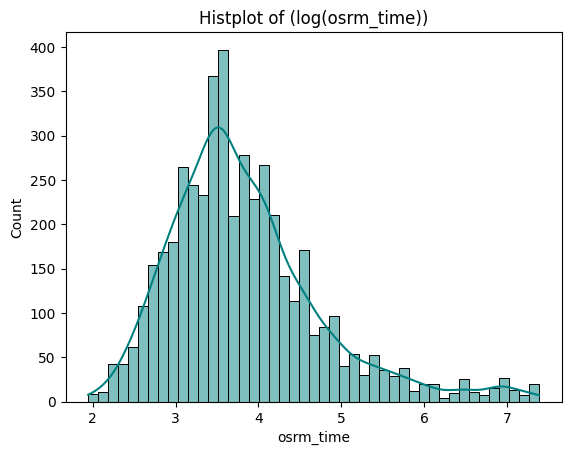

In [111]:
sns.histplot(np.log(dt['osrm_time']), kde=True,color='teal')
plt.title('Histplot of (log(osrm_time))')

Text(0.5, 1.0, 'Histplot of (log(segment_osrm_time))')

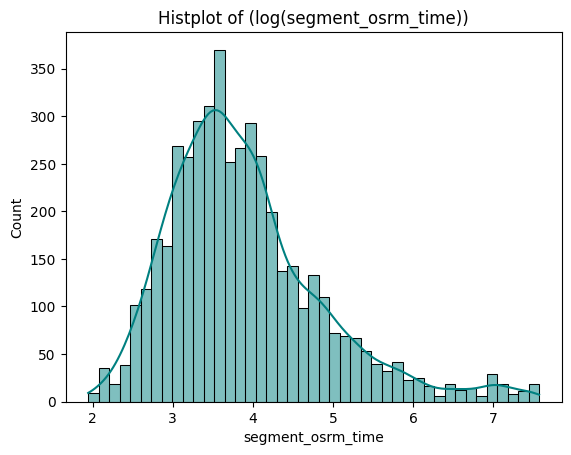

In [112]:
sns.histplot(np.log(dt['segment_osrm_time']), kde=True,color='teal')
plt.title('Histplot of (log(segment_osrm_time))')

Text(0.5, 1.0, 'QQPlot of (log(osrm_time))')

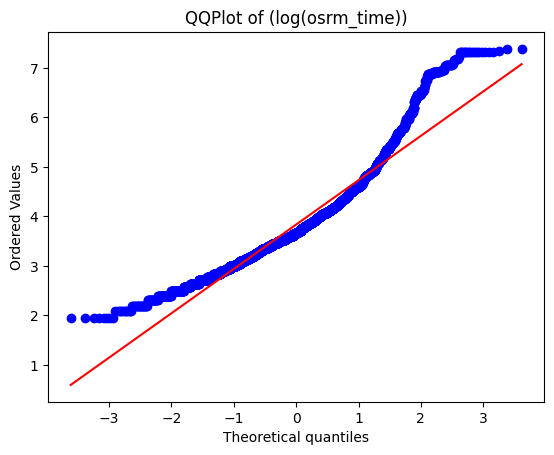

In [113]:
stats.probplot(np.log(dt['osrm_time']), dist="norm", plot=plt)
plt.title('QQPlot of (log(osrm_time))')

Text(0.5, 1.0, 'QQPlot of (log(segment_osrm_time))')

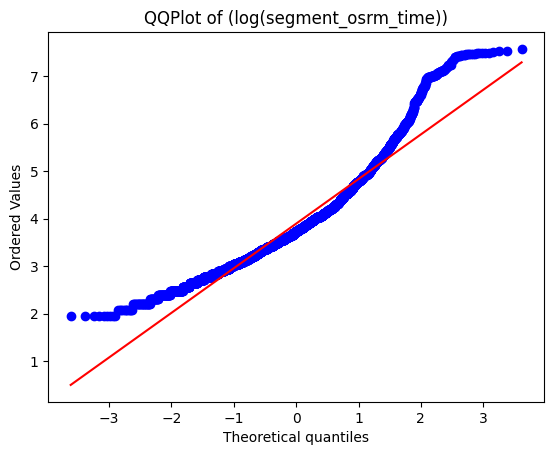

In [114]:
stats.probplot(np.log(dt['segment_osrm_time']), dist="norm", plot=plt)
plt.title('QQPlot of (log(segment_osrm_time))')

In [115]:
stat, p_value = shapiro(np.log(dt['osrm_time']))

print('Test Statistic:', stat)
print('P-value:', p_value)

Test Statistic: 0.9280433766003446
P-value: 1.520180615303698e-42


In [116]:
if p_value > 0.05:
  print('Data is normally distributed')
else:
  print('Data is not normally distributed')

Data is not normally distributed


In [117]:
stat, p_value = shapiro(np.log(dt['segment_osrm_time']))

print('Test Statistic:', stat)
print('P-value:', p_value)

Test Statistic: 0.932932822122217
P-value: 1.861598218851104e-41


In [118]:
if p_value > 0.05:
  print('Data is normally distributed')
else:
  print('Data is not normally distributed')

Data is not normally distributed


#Select the Appropirate Test


#Defining the significance level

The significance value, for this hypothesis would be 0.0


#Wilcoxon Signed-Rank Test


#Calculating the p_value

In [119]:
stat, p_value = wilcoxon(np.log(dt['osrm_time']), np.log(dt['segment_osrm_time']))

print('Wilcoxon Test Statistic:', stat)
print('P-value:', p_value)

Wilcoxon Test Statistic: 1730908.5
P-value: 3.341965147498398e-86


In [120]:
if p_value > 0.05:
  print('osrm_time and segment_osrm_time have the same mean.')
else:
  print('osrm_time and segment_osrm_time does not have the same mean.')

osrm_time and segment_osrm_time does not have the same mean.


#Conclusion :
Based on the Wilcoxon Signed-Rank Test (p < 0.05), osrm_time and segment_osrm_time does not have the same mean.

#Finding outliers

In [121]:
numerical_dt.columns

Index(['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_actual_time_sum',
       'segment_osrm_time_sum', 'segment_osrm_distance_sum', 'od_total_time',
       'trip_creation_month', 'trip_creation_year', 'trip_creation_day'],
      dtype='object')

In [122]:
numerical_dt.shape

(4626, 15)

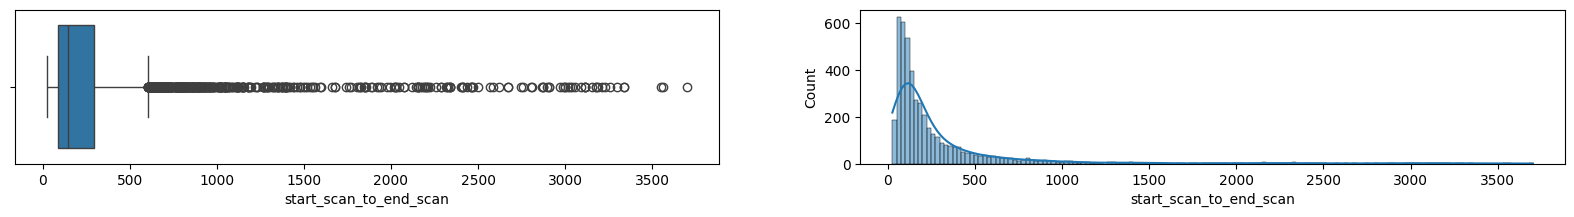

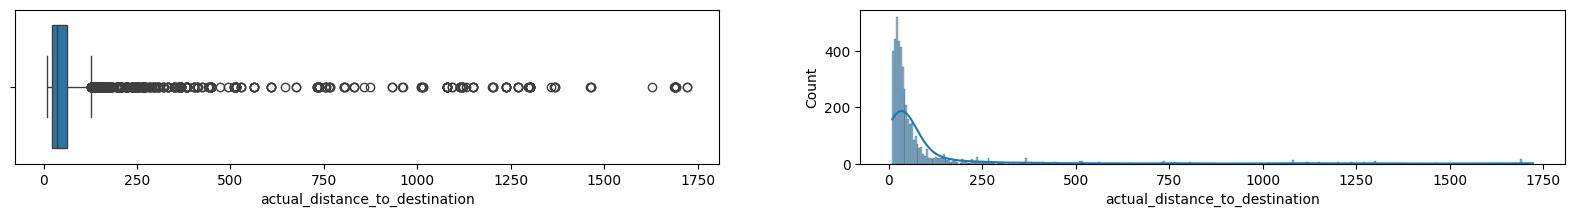

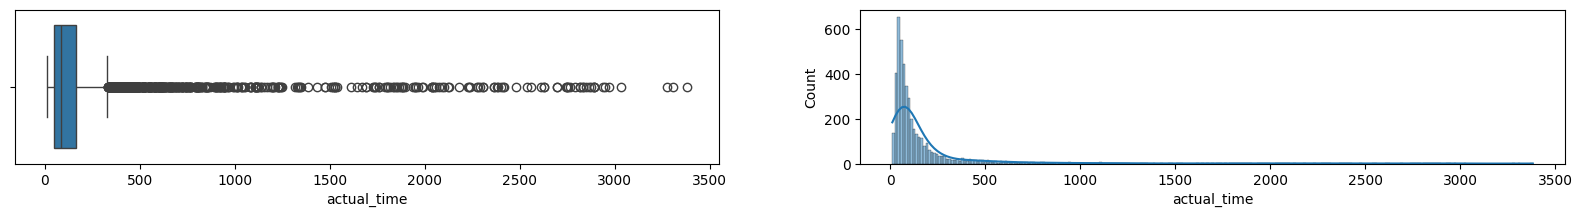

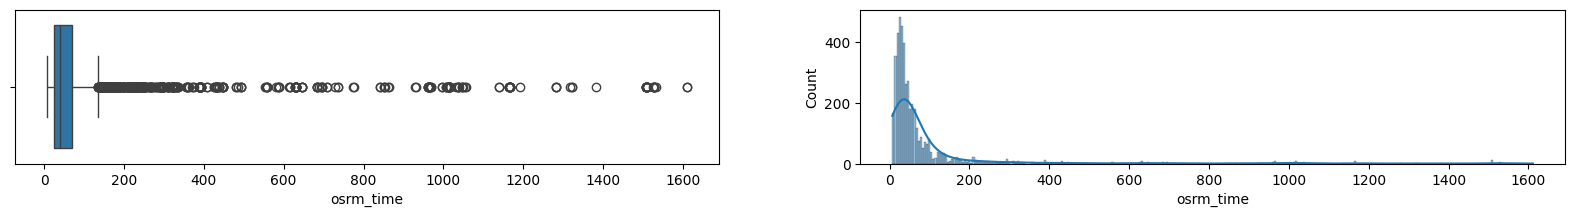

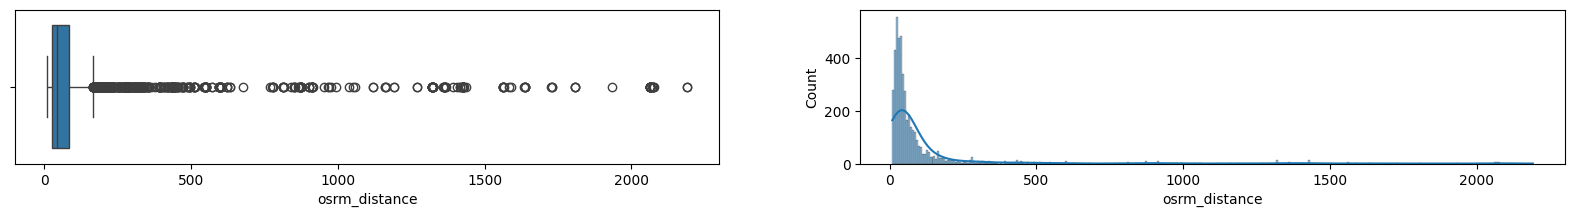

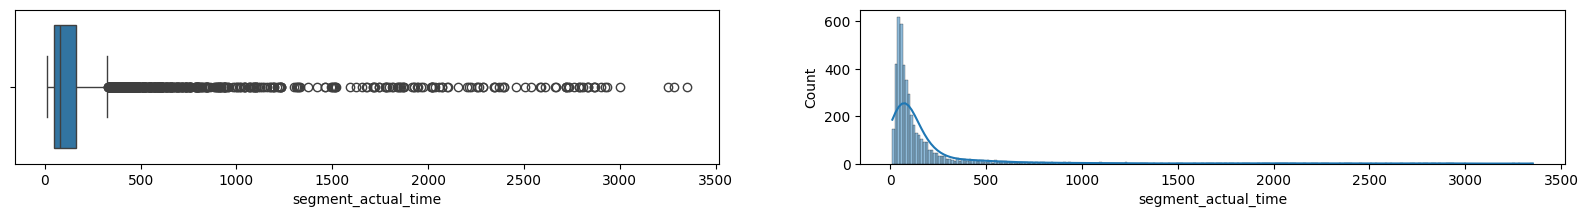

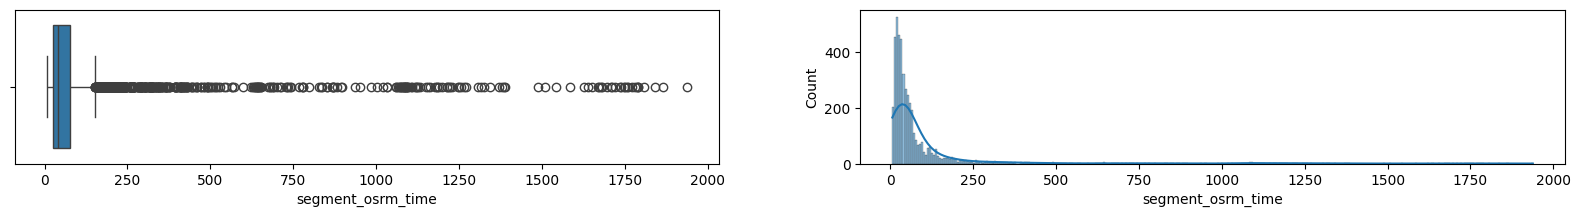

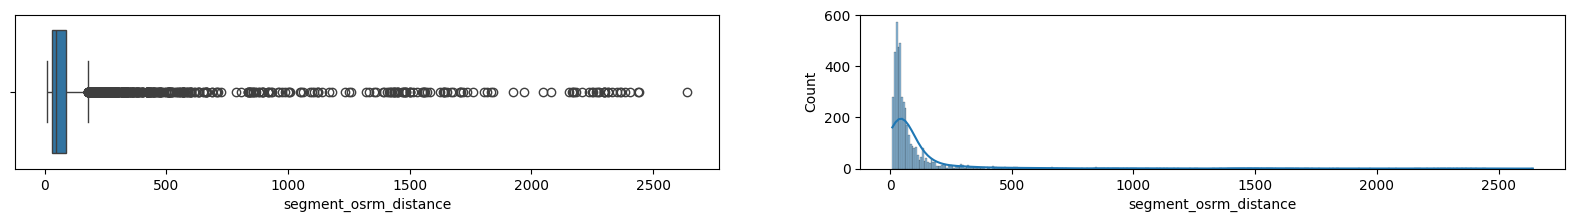

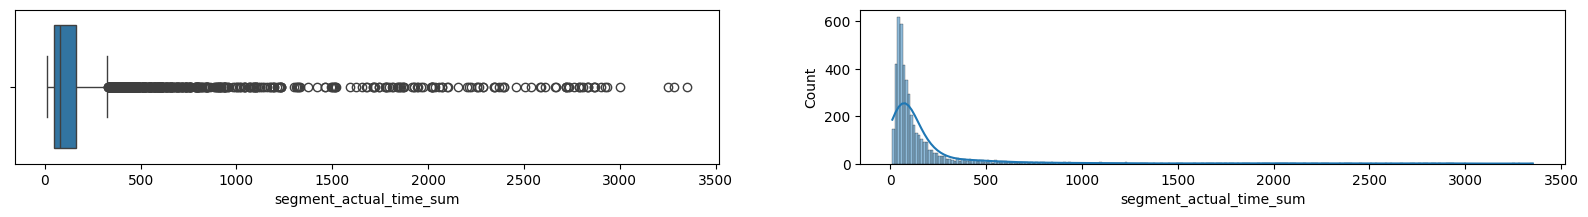

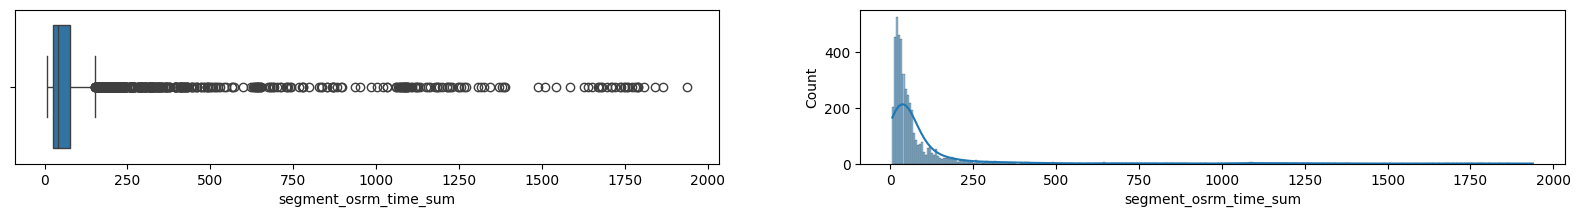

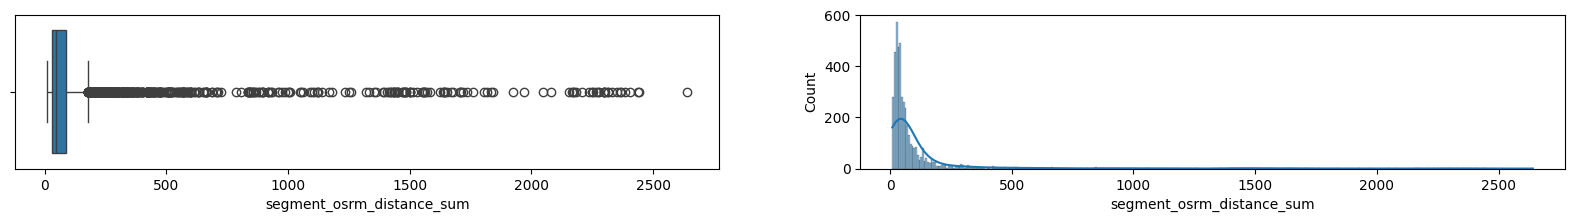

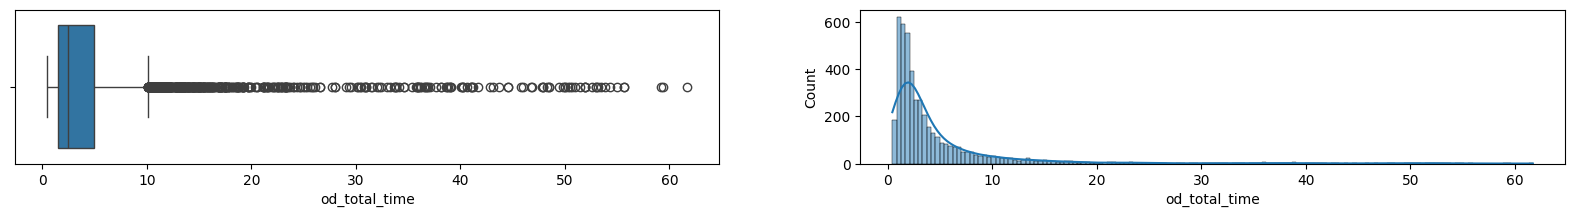

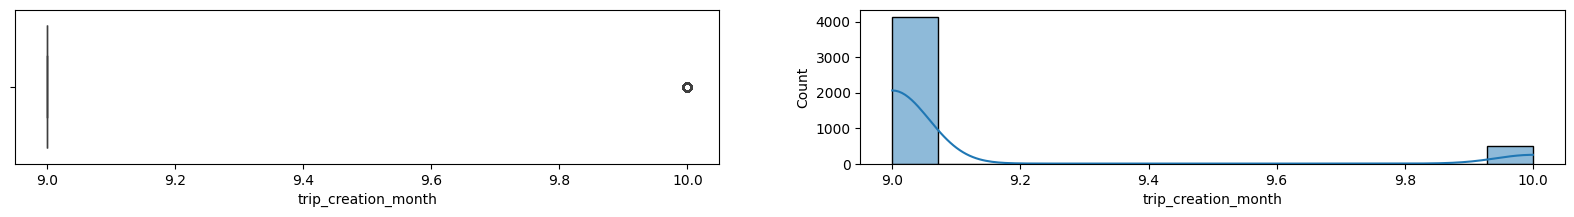

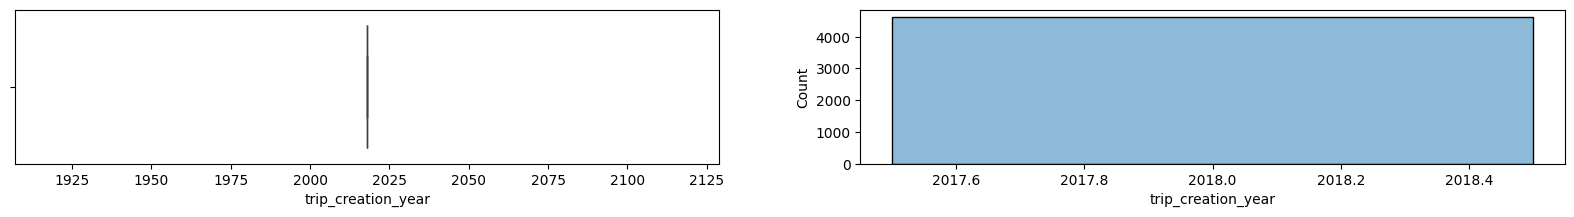

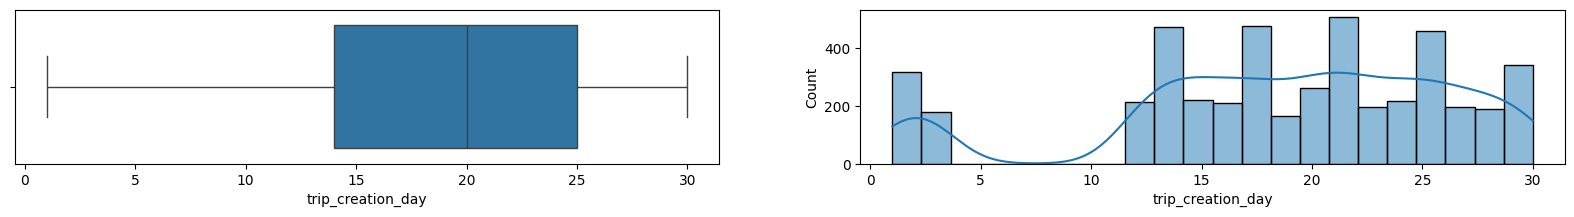

In [123]:
for i in numerical_dt.columns:
  plt.figure(figsize=(20,2))
  plt.subplot(1,2,1)
  sns.boxplot(data=numerical_dt,x=i)
  plt.subplot(1,2,2)
  sns.histplot(data=numerical_dt,x=i,kde=True)

Almost most of the columns contains outliers except trip_creation_month,trip_creation_year and trip_creation_day

#Outlier Removal

In [124]:
dt_cleaned = dt.copy()

In [125]:
dt_cleaned.columns

Index(['segment_key', 'trip_uuid', 'data', 'route_type', 'trip_creation_time',
       'source_name', 'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_actual_time_sum',
       'segment_osrm_time_sum', 'segment_osrm_distance_sum', 'od_total_time',
       'source_city', 'source_place', 'source_state', 'destination_city',
       'destination_place', 'destination_state', 'corridor', 'state_corridor',
       'trip_creation_month', 'trip_creation_year', 'trip_creation_day',
       'trip_creation_week'],
      dtype='object')

In [126]:
for col in numerical_dt.columns:
  q1 = np.quantile(dt[col],0.25)
  q3 = np.quantile(dt[col],0.75)
  IQR = q3-q1
  Lower_bound = q1 - 1.5*IQR
  Upper_bound = q3 + 1.5*IQR

  dt_cleaned = dt_cleaned[(dt_cleaned[col] >= Lower_bound) & (dt_cleaned[col] <= Upper_bound)]



In [127]:
#Applying Log Transformation in the Numerical columns
for col in numerical_dt.columns:
  dt_cleaned[col] = np.log(dt_cleaned[col])

In [128]:
num = dt_cleaned.select_dtypes(include=['float64','int32'])

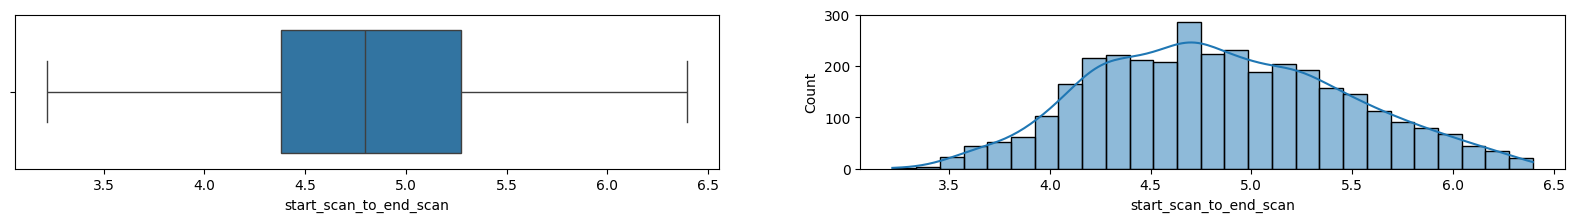

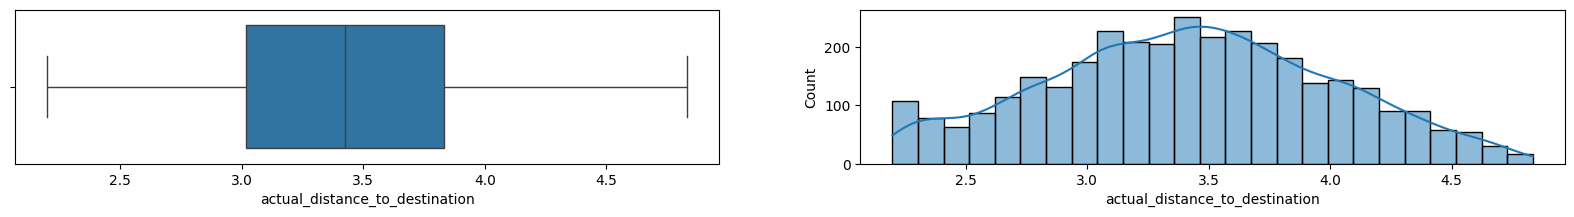

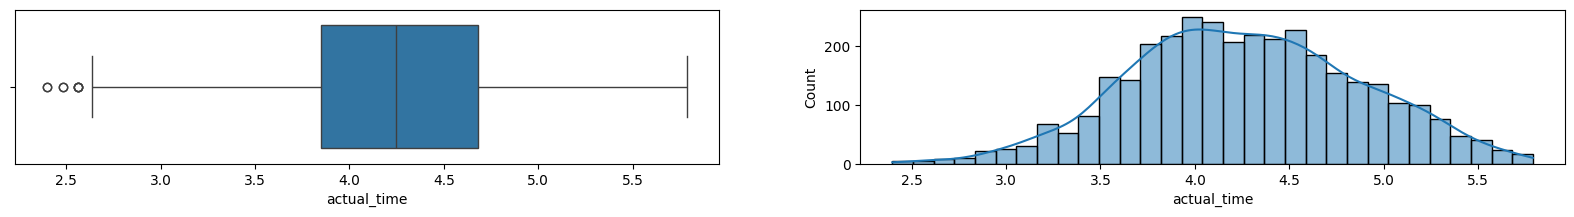

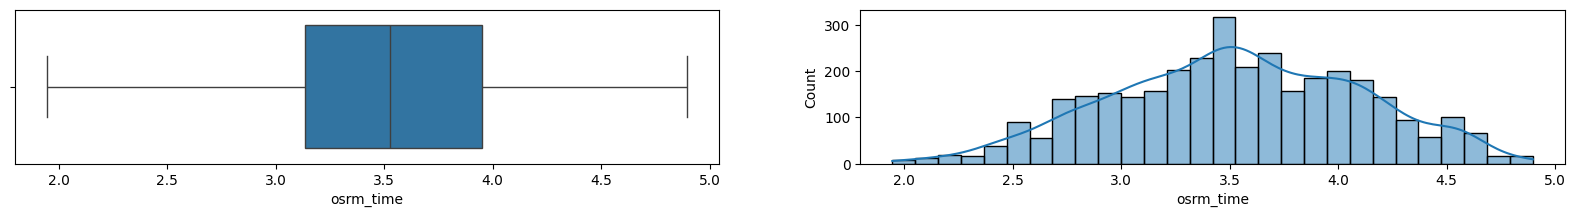

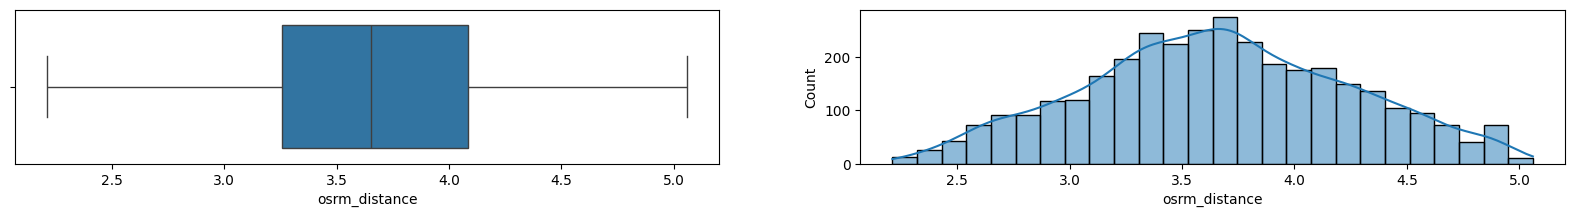

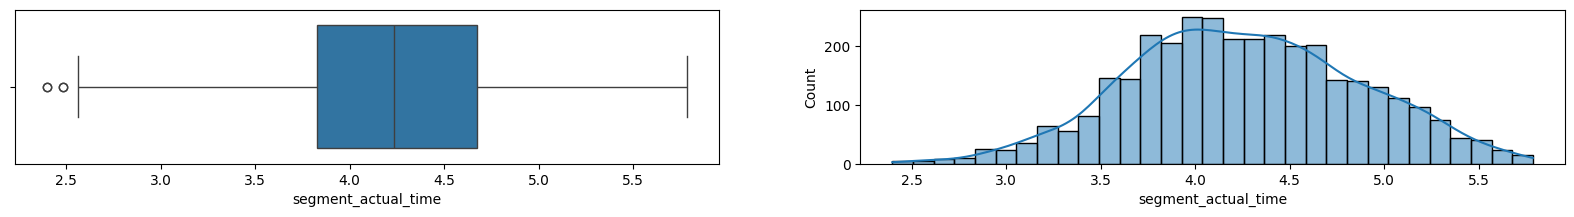

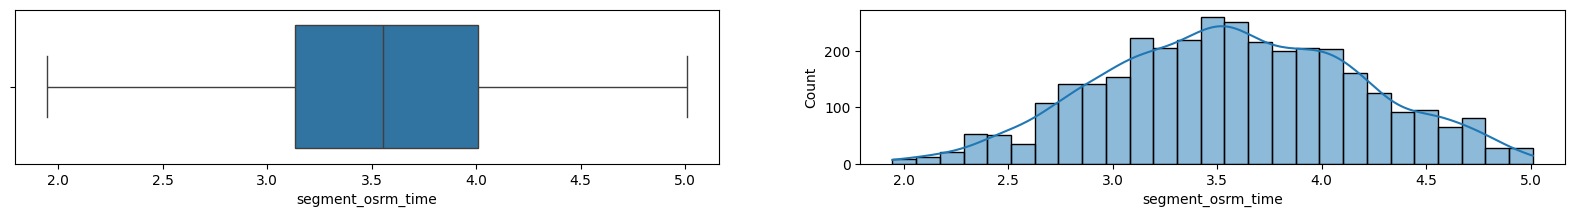

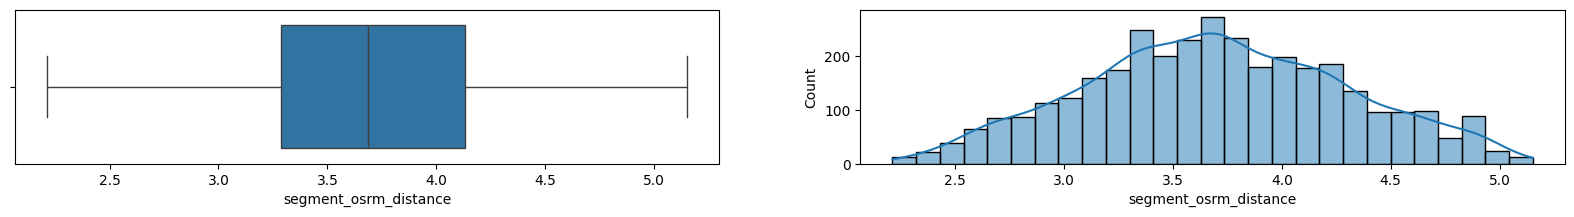

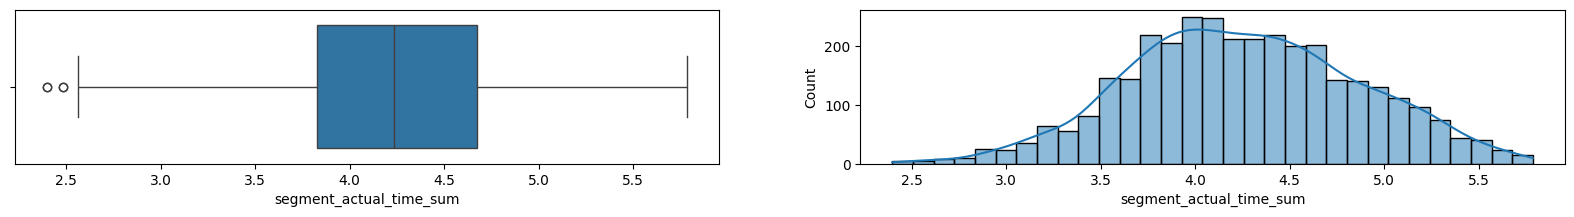

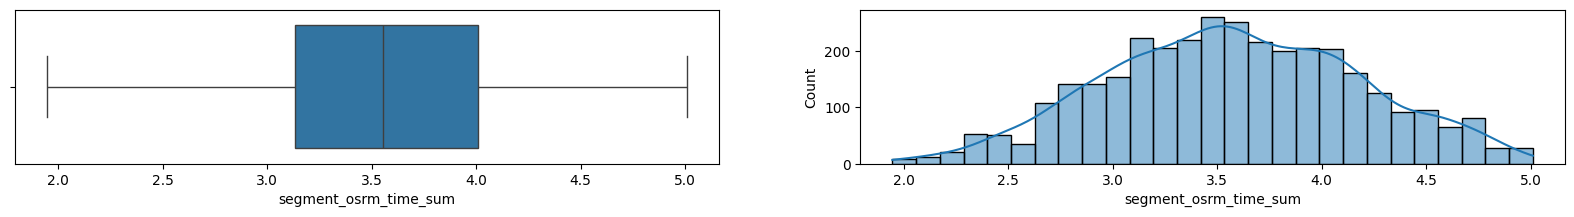

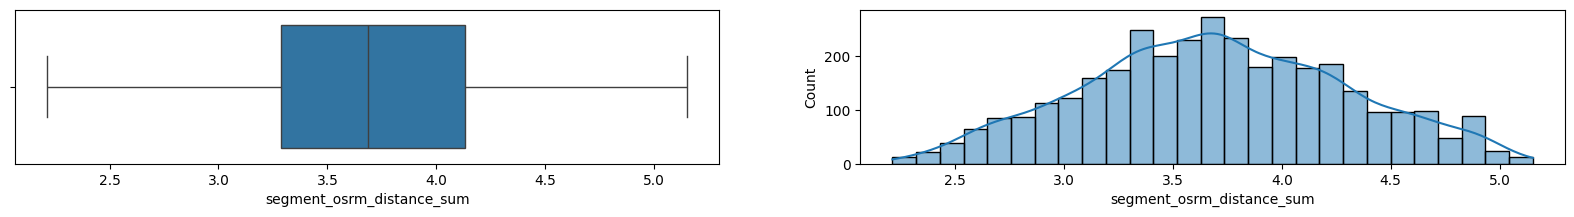

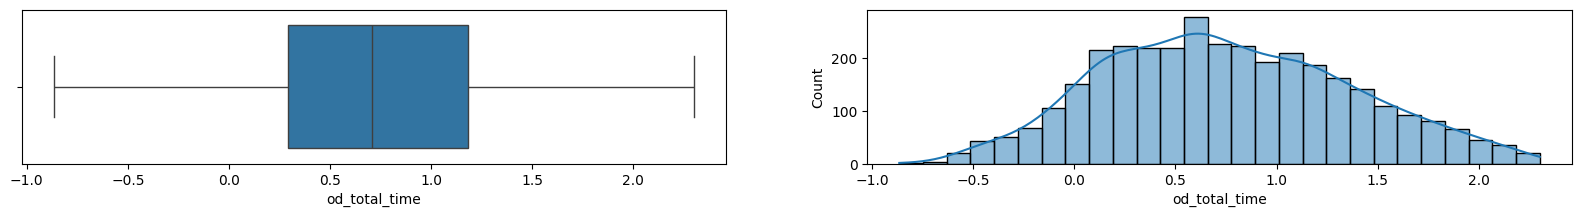

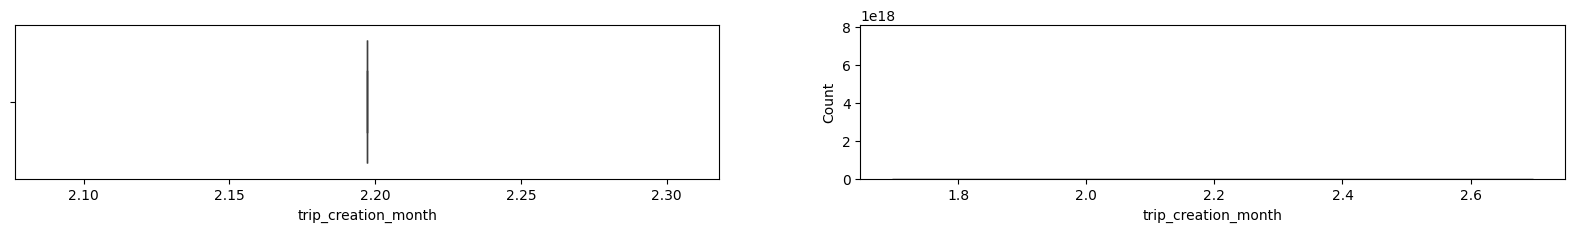

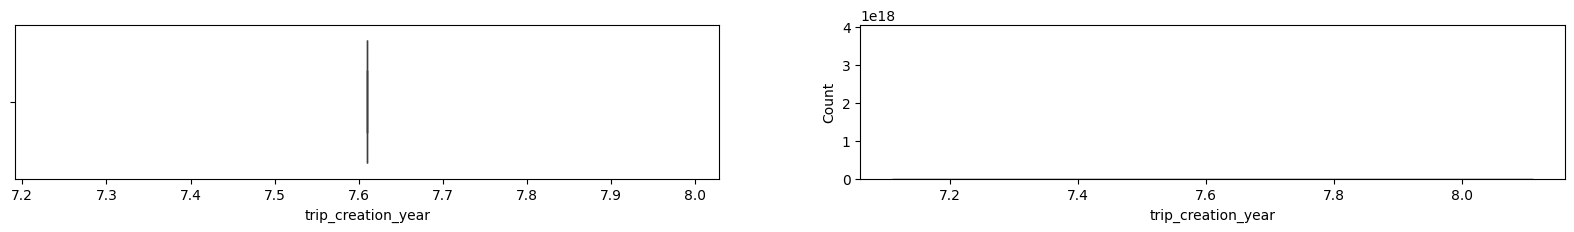

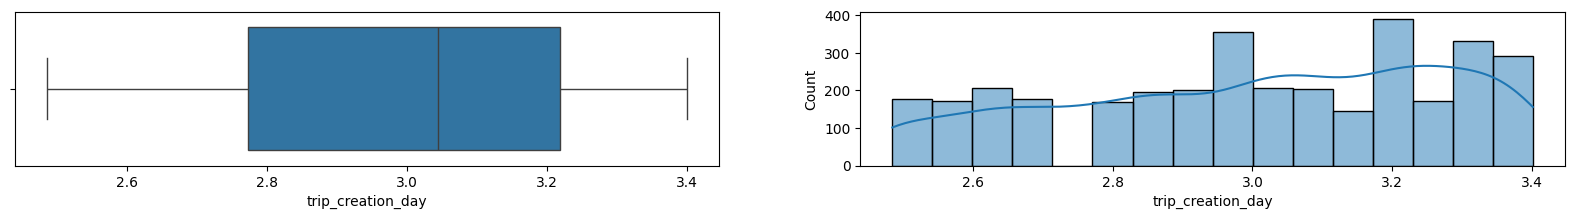

In [129]:
for i in num.columns:
  plt.figure(figsize=(20,2))
  plt.subplot(1,2,1)
  sns.boxplot(data=dt_cleaned,x=i)
  plt.subplot(1,2,2)
  sns.histplot(data=dt_cleaned,x=i,kde=True)

In [140]:
correlation_matrix = num.corr()
correlation_matrix

start_scan_to_end_scan  \
start_scan_to_end_scan                        1.000000   
actual_distance_to_destination                0.500257   
actual_time                                   0.708298   
osrm_time                                     0.538126   
osrm_distance                                 0.535387   
segment_actual_time                           0.707708   
segment_osrm_time                             0.545911   
segment_osrm_distance                         0.550262   
segment_actual_time_sum                       0.707708   
segment_osrm_time_sum                         0.545911   
segment_osrm_distance_sum                     0.550262   
od_total_time                                 0.999986   
trip_creation_month                                NaN   
trip_creation_year                                 NaN   
trip_creation_day                             0.012458   

                                actual_distance_to_destination  actual_time  \
start_scan_to_end_scan                                0.500257     0.708298   
actual_distance_to_destination                        1.000000     0.729148   
actual_time                                           0.729148     1.000000   
osrm_time                                             0.893111     0.748359   
osrm_distance                                         0.953829     0.764362   
segment_actual_time                                   0.726113     0.999813   
segment_osrm_time                                     0.861774     0.755321   
segment_osrm_distance                                 0.932736     0.776110   
segment_actual_time_sum                               0.726113     0.999813   
segment_osrm_time_sum                                 0.861774     0.755321   
segment_osrm_distance_sum                             0.932736     0.776110   
od_total_time                                         0.500026     0.707959   
trip_creation_month                                        NaN          NaN   
trip_creation_year                                         NaN          NaN   
trip_creation_day                                    -0.037189    -0.050388   

                                osrm_time  osrm_distance  segment_actual_time  \
start_scan_to_end_scan           0.538126       0.535387             0.707708   
actual_distance_to_destination   0.893111       0.953829             0.726113   
actual_time                      0.748359       0.764362             0.999813   
osrm_time                        1.000000       0.953265             0.745510   
osrm_distance                    0.953265       1.000000             0.761804   
segment_actual_time              0.745510       0.761804             1.000000   
segment_osrm_time                0.972750       0.927773             0.752570   
segment_osrm_distance            0.939806       0.977980             0.773409   
segment_actual_time_sum          0.745510       0.761804             1.000000   
segment_osrm_time_sum            0.972750       0.927773             0.752570   
segment_osrm_distance_sum        0.939806       0.977980             0.773409   
od_total_time                    0.537801       0.535092             0.707371   
trip_creation_month                   NaN            NaN                  NaN   
trip_creation_year                    NaN            NaN                  NaN   
trip_creation_day               -0.047739      -0.034967            -0.050180   

                                segment_osrm_time  segment_osrm_distance  \
start_scan_to_end_scan                   0.545911               0.550262   
actual_distance_to_destination           0.861774               0.932736   
actual_time                              0.755321               0.776110   
osrm_time                                0.972750               0.939806   
osrm_distance                            0.927773               0.977980   
segment_actual_time                      0.752570               0.773409   
segment_o

Text(0.5, 1.0, 'Correlation Matrix')

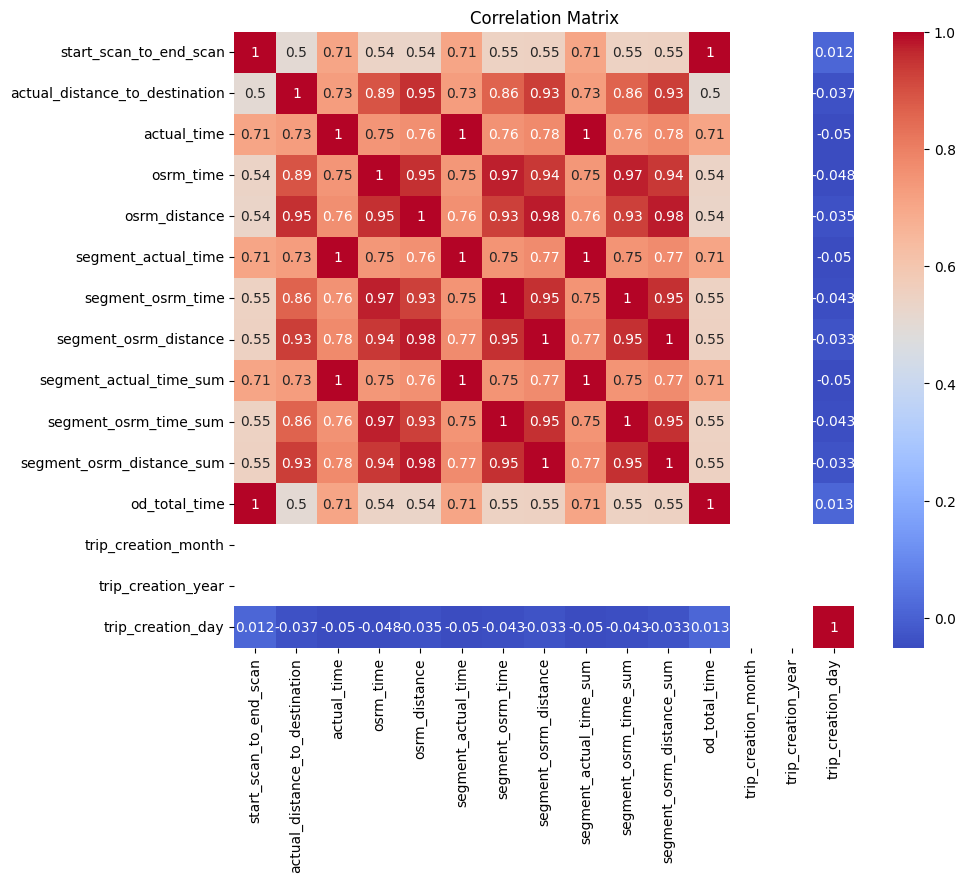

In [141]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")

In [130]:
#Dropping the unnecessary columns
dt_cleaned.drop(columns=['od_start_time','od_end_time'],inplace=True)

In [131]:
dt_cleaned.shape

(3388, 31)

In [132]:
categorical_cols = ['data','route_type']

#One Hot Encoding for the Categorical variable

In [133]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
encoded_cat_cols = ohe.fit_transform(dt_cleaned[categorical_cols])

categorical_encoded_df = pd.DataFrame(encoded_cat_cols, columns=ohe.get_feature_names_out(categorical_cols))
display(categorical_encoded_df)

df_final = pd.concat([dt_cleaned,categorical_encoded_df],axis=1)
df_final.head()


data_test  data_training  route_type_Carting  route_type_FTL
0           0.0            1.0                 1.0             0.0
1           0.0            1.0                 1.0             0.0
2           0.0            1.0                 0.0             1.0
3           0.0            1.0                 0.0             1.0
4           0.0            1.0                 1.0             0.0
...         ...            ...                 ...             ...
3383        1.0            0.0                 1.0             0.0
3384        1.0            0.0                 1.0             0.0
3385        1.0            0.0                 1.0             0.0
3386        1.0            0.0                 1.0             0.0
3387        1.0            0.0                 1.0             0.0

[3388 rows x 4 columns]

segment_key                trip_uuid  \
0  trip-153671079956500691IND110024AAAIND110014AAA  trip-153671079956500691   
1  trip-153671110078355292IND121004AABIND121001AAA  trip-153671110078355292   
2  trip-153671191949943656IND487001AABIND487551AAA  trip-153671191949943656   
3  trip-153671191949943656IND487551AAAIND464668AAA  trip-153671191949943656   
4  trip-153671237597058150IND785690AABIND785682AAA  trip-153671237597058150   

       data route_type         trip_creation_time  \
0  training    Carting 2018-09-12 00:06:39.565253   
1  training    Carting 2018-09-12 00:11:40.783923   
2  training        FTL 2018-09-12 00:25:19.499696   
3  training        FTL 2018-09-12 00:25:19.499696   
4  training    Carting 2018-09-12 00:32:55.970840   

                               source_name  \
0                  Delhi_Lajpat_IP (Delhi)   
1             FBD_Balabhgarh_DPC (Haryana)   
2  Narsinghpur_KndliDPP_D (Madhya Pradesh)   
3      Gadarwara_MPward_D (Madhya Pradesh)   
4             Sonari_Central_DPP_1 (Assam)   

                      destination_name  start_scan_to_end_scan  \
0                 Delhi_Bhogal (Delhi)                3.891820   
1                  Faridabad (Haryana)                3.637586   
2  Gadarwara_MPward_D (Madhya Pradesh)                4.454347   
3   Bareli_SourvDPP_D (Madhya Pradesh)                5.318120   
4         Sivasagar_Babupaty_D (Assam)                5.529429   

   actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                        2.289717     3.135494   2.079442       2.298236   
1                        2.240340     2.833213   2.197225       2.381017   
2                        3.752566     4.356709   3.737670       3.879766   
3                        4.049090     5.164786   4.143135       4.331962   
4                        3.676198     5.484797   3.496508       3.848203   

   segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0             3.135494           2.639057               2.777949   
1             2.833213           2.197225               2.381017   
2             4.356709           3.713572               3.879766   
3             5.159055           4.510860               4.523411   
4             5.480639           3.891820               4.038791   

   segment_actual_time_sum  segment_osrm_time_sum  segment_osrm_distance_sum  \
0                 3.135494               2.639057                   2.777949   
1                 2.833213               2.197225                   2.381017   
2                 4.356709               3.713572                   3.879766   
3                 5.159055               4.510860                   4.523411   
4                 5.480639               3.891820                   4.038791   

   od_total_time  source_city    source_place    source_state  \
0      -0.195743        Delhi       Lajpat_IP           Delhi   
1      -0.443673          FBD  Balabhgarh_DPC         Haryana   
2       0.360649  Narsinghpur      KndliDPP_D  Madhya Pradesh   
3       1.226745    Gadarwara        MPward_D  Madhya Pradesh   
4       1.435390       Sonari   Central_DPP_1           Assam   

  destination_city destination_place destination_state  \
0            Delhi            Bhogal             Delhi   
1        Faridabad         Faridabad           Haryana   
2        Gadarwara          MPward_D    Madhya Pradesh   
3           Bareli        SourvDPP_D    Madhya Pradesh   
4        Sivasagar        Babupaty_D             Assam   

                                            corridor  \
0  Delhi_Lajpat_IP (Delhi) <---> Delhi_Bhogal (De...   
1  FBD_Balabhgarh_DPC (Haryana) <---> Faridabad (...   
2  Narsinghpur_KndliDPP_D (Madhya Pradesh) <---> ...   
3  Gadarwara_MPward_D (Madhya Pradesh) <---> Bare...   
4  Sonari_Central_DPP_1 (Assam) <---> Sivasagar_B...   

                                      state_corridor  trip_creation_month  \
0                    Delhi--Delhi <---> Delhi--Delhi             2.197

In [134]:
df_final = df_final.drop(['data','route_type'], axis=1)

#Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

In [135]:
numerical_cols = df_final.select_dtypes(include=['float64','int32']).columns

#MinMaxScaler

In [136]:
min_max_scaler = MinMaxScaler()
min_max_scaled_numerical = min_max_scaler.fit_transform(df_final[numerical_cols])

min_max_scaled_df = pd.DataFrame(min_max_scaled_numerical, columns=numerical_cols)
min_max_scaled_df.head()

start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                0.211747                        0.034774     0.217448   
1                0.131751                        0.016041     0.128334   
2                0.388751                        0.589761     0.577469   
3                0.660544                        0.702258     0.815695   
4                0.727034                        0.560788     0.910036   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0   0.045235       0.030191             0.217645           0.226169   
1   0.085136       0.059263             0.128450           0.082002   
2   0.606979       0.585604             0.577991           0.576777   
3   0.744335       0.744409             0.814741           0.836926   
4   0.525283       0.574519             0.909632           0.634938   

   segment_osrm_distance  segment_actual_time_sum  segment_osrm_time_sum  \
0               0.192406                 0.217645               0.226169   
1               0.057397                 0.128450               0.082002   
2               0.567167                 0.577991               0.576777   
3               0.786090                 0.814741               0.836926   
4               0.621257                 0.909632               0.634938   

   segment_osrm_distance_sum  od_total_time  trip_creation_month  \
0                   0.192406       0.211602                  0.0   
1                   0.057397       0.133364                  0.0   
2                   0.567167       0.387182                  0.0   
3                   0.786090       0.660493                  0.0   
4                   0.621257       0.726335                  0.0   

   trip_creation_year  trip_creation_day  data_test  data_training  \
0                 0.0                0.0        0.0            1.0   
1                 0.0                0.0        0.0            1.0   
2                 0.0                0.0        0.0            1.0   
3                 0.0                0.0        0.0            1.0   
4                 0.0                0.0        0.0            1.0   

   route_type_Carting  route_type_FTL  
0                 1.0             0.0  
1                 1.0             0.0  
2                 0.0             1.0  
3                 0.0             1.0  
4                 1.0             0.0

#StandardScaler

In [137]:
std_scaler = StandardScaler()
std_scaled = std_scaler.fit_transform(df_final[numerical_cols])

# Converting the scaled features back to a dataframe
std_scaled_df = pd.DataFrame(std_scaled, columns=numerical_cols)
std_scaled_df.head()

start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0               -1.558647                       -1.918731    -1.877594   
1               -1.974352                       -2.002779    -2.378531   
2               -0.638844                        0.571253     0.146193   
3                0.773534                        1.075981     1.485331   
4                1.119051                        0.441264     2.015650   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0  -2.537785      -2.319853            -1.857088          -1.547393   
1  -2.332035      -2.178789            -2.357077          -2.278214   
2   0.358904       0.375156             0.162868           0.229926   
3   1.067194       1.145719             1.489993           1.548692   
4  -0.062372       0.321371             2.021910           0.524760   

   segment_osrm_distance  segment_actual_time_sum  segment_osrm_time_sum  \
0              -1.534775                -1.857088              -1.547393   
1              -2.196029                -2.357077              -2.278214   
2               0.300758                 0.162868               0.229926   
3               1.373016                 1.489993               1.548692   
4               0.565680                 2.021910               0.524760   

   segment_osrm_distance_sum  od_total_time  trip_creation_month  \
0                  -1.534775      -1.561987                  0.0   
1                  -2.196029      -1.969138                  0.0   
2                   0.300758      -0.648279                  0.0   
3                   1.373016       0.774025                  0.0   
4                   0.565680       1.116662                  0.0   

   trip_creation_year  trip_creation_day  data_test  data_training  \
0                 0.0          -1.903399  -0.474675       0.474675   
1                 0.0          -1.903399  -0.474675       0.474675   
2                 0.0          -1.903399  -0.474675       0.474675   
3                 0.0          -1.903399  -0.474675       0.474675   
4                 0.0          -1.903399  -0.474675       0.474675   

   route_type_Carting  route_type_FTL  
0            0.961769       -0.961769  
1            0.961769       -0.961769  
2           -1.039750        1.039750  
3           -1.039750        1.039750  
4            0.961769       -0.961769

#Insights:

#   88% of the trips are from October Month & remaining are from November
# The entire data is heavily right skewed
# Almost all the features are heavy positively correleated with each other & which is intutive as well.
# Start & End dates of the months have less percent of trips compare to mid of the month. Though the difference is not huge
# Thats very strange to see that there is absolutely no trip from 4th- 11th day of the month
# Most orders come mid-month. That means customers usually make more orders in the mid of the month.

# The analysis reveals that a higher proportion of shipments are routed through Full Truck Load (FTL) as opposed to carting. This has important implications for the efficiency and speed of the delivery process.

# State: The states of Haryana, Maharashtra, and Karnataka are not only busy source states but also emerge as the busiest source states, indicating a high demand or significant business activities originating from these regions.

# source city: Gurgaon, Bangalore, and Bhiwandi are identified as the busiest source cities, suggesting that these cities play a crucial role in contributing to the overall business operations or transportation activities.

# Destination city: Gurgaon, Bangalore, and Hyderabad are identified as the busiest destination cities, underscoring their significance in terms of business activities or population movement.

#  The busiest corridor is Mumbai_Maharashtra and Bangalore_Karnataka which has the maximum trips.



#Recommendation:

# Since Gurgaon and Bangalore are identified as the busiest source and destination cities, respectively, focus on city-specific strategies to manage the high traffic volume.
# Implement advanced demand forecasting techniques to anticipate peak travel times and adjust transportation services accordingly. This proactive approach can help in better resource allocation and minimize the impact of congestion during peak hours.
# Improving accuracy in estimated delivery times and distances can contribute to increased customer satisfaction.
# Customer profiling of the customers belonging to the states Maharashtra, Karnataka, Haryana, Tamil Nadu and Uttar Pradesh has to be done to get to know why major orders are coming from these atates and to improve customers' buying and delivery experience.
# Fine-tuning logistics planning based on more accurate measurements can lead to better resource allocation and potentially reduce operational costs.